# Packages used

In [1]:
!conda list
!which python
!python --version
!jupyter kernelspec list

# packages in environment at /Users/douglas/anaconda3/envs/cobra_venv:
#
# Name                    Version                   Build  Channel
adjusttext                1.2.0              pyhd8ed1ab_0    conda-forge
annotated-types           0.7.0              pyhd8ed1ab_0    conda-forge
anyio                     4.2.0           py311hecd8cb5_0  
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
appnope                   0.1.2           py311hecd8cb5_1001  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py311h6c40b1e_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
async-lru                 2.0.4           py311hecd8cb5_0  
attrs                     23.1.0          py311hecd8cb5_0  
babel                     2.11.0          py311hecd8cb5_0  
beautifulsoup4            4.12.3          py311hecd8cb5_0  
blas                      1.0                    openblas  
bleach                    4.1.0       

# Data 
Input: Section 5 outputs (output from 'matlab_code_gimme.ipynb'): mat files for each individual sample, organized into folders named based on their ID (W5D2T0, W5D2T120, W5D3T0, W5D3T120, W5D3T240). 


Each folder contains individual .mat files, representing context-specific models.

# Check for unpaired file

In [2]:
import os

# Directories containing the .mat files
directory_path1 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0'
directory_path2 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T120'

# Function to extract identifiers from filenames
def extract_identifiers(directory_path):
    identifiers = set()
    filenames = os.listdir(directory_path)
    for filename in filenames:
        if filename.endswith(".mat"):
            identifier = filename.split('_')[0]  # Assuming identifier is the first part before the first underscore
            identifiers.add(identifier)
    return identifiers, filenames

# Extract identifiers and filenames from both directories
identifiers1, filenames1 = extract_identifiers(directory_path1)
identifiers2, filenames2 = extract_identifiers(directory_path2)

# Find unpaired files
unpaired_in_dir1 = [filename for filename in filenames1 if filename.split('_')[0] not in identifiers2]
unpaired_in_dir2 = [filename for filename in filenames2 if filename.split('_')[0] not in identifiers1]

print(f"Unpaired files in {directory_path1}:")
for filename in unpaired_in_dir1:
    print(filename)

print(f"\nUnpaired files in {directory_path2}:")
for filename in unpaired_in_dir2:
    print(filename)


Unpaired files in /Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0:
.DS_Store

Unpaired files in /Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T120:
.DS_Store


# Loading the file

In [3]:
import scipy.io
import cobra
from cobra.io import load_matlab_model
import sys
print(sys.executable)

# Path to your .mat file
file_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0/NT001_W5D2T0.mat'

# Load the .mat file using scipy
mat = scipy.io.loadmat(file_path)

# Convert the loaded .mat content to a COBRA model
model = load_matlab_model(file_path)

# Print basic information about the model
print(f'Model ID: {model.id}')
print(f'Number of Reactions: {len(model.reactions)}')
print(f'Number of Metabolites: {len(model.metabolites)}')
print(f'Number of Genes: {len(model.genes)}')

# Display some reactions
for reaction in model.reactions[:10]:  # Print the first 10 reactions as an example
    print(reaction)

/Users/douglas/anaconda3/envs/cobra_venv/bin/python


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Model ID: model
Number of Reactions: 2239
Number of Metabolites: 2343
Number of Genes: 2248
2HBO: 2hb[c] + nad[c] <=> 2obut[c] + h[c] + nadh[c]
2HBt2: 2hb[e] + h[e] <=> 2hb[c] + h[c]
34DHPHAMT: 34dhpha[c] + amet[c] --> ahcys[c] + h[c] + homoval[c]
34HPLFM: 34hpp[m] + h[m] + nadh[m] --> 34hpl[m] + nad[m]
3HBCOAHLm: 3hibutcoa[m] + h2o[m] --> 3hmp[m] + coa[m] + h[m]
3SALATAim: 3sala[m] + akg[m] + h[m] --> 3snpyr[m] + glu_L[m]
5ADTSTSTERONEGLCte: 5adtststeroneglc[c] + atp[c] + h2o[c] --> 5adtststeroneglc[e] + adp[c] + h[c] + pi[c]
A_MANASEly: 2.0 h2o[l] + m2mn[l] --> 2.0 man[l] + mn[l]
ABUTt2rL: 4abut[l] + h[l] <=> 4abut[c] + h[c]
ACACT10m: 2maacoa[m] + coa[m] <=> accoa[m] + ppcoa[m]


In [4]:
print(model.objective.expression)
print(model.objective.direction)

1.0*DM_atp_c_ - 1.0*DM_atp_c__reverse_5d8a2
max


# code to calculate jaccard distance

In [5]:
# Load all models 
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat

# Directory containing the .mat files
directory_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0'

# Load all models from the directory
context_specific_models = []
for filename in os.listdir(directory_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path, filename)
        model = load_matlab_model(file_path)
        context_specific_models.append(model)

print(f"Loaded {len(context_specific_models)} models.")


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 65 models.


In [6]:
# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D2T0_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")

Jaccard distance matrix calculated.
[[1.         0.83471797 0.88356164 ... 0.86762719 0.86588659 0.83980583]
 [0.83471797 1.         0.81100683 ... 0.83807063 0.85397653 0.82510638]
 [0.88356164 0.81100683 1.         ... 0.8505291  0.85948582 0.82045749]
 ...
 [0.86762719 0.83807063 0.8505291  ... 1.         0.86637168 0.81007256]
 [0.86588659 0.85397653 0.85948582 ... 0.86637168 1.         0.82794308]
 [0.83980583 0.82510638 0.82045749 ... 0.81007256 0.82794308 1.        ]]
Jaccard scores saved to Week10_W5D2T0_JaccardScore.mat.


In [7]:
jaccard_scores

array([[1.        , 0.83471797, 0.88356164, ..., 0.86762719, 0.86588659,
        0.83980583],
       [0.83471797, 1.        , 0.81100683, ..., 0.83807063, 0.85397653,
        0.82510638],
       [0.88356164, 0.81100683, 1.        , ..., 0.8505291 , 0.85948582,
        0.82045749],
       ...,
       [0.86762719, 0.83807063, 0.8505291 , ..., 1.        , 0.86637168,
        0.81007256],
       [0.86588659, 0.85397653, 0.85948582, ..., 0.86637168, 1.        ,
        0.82794308],
       [0.83980583, 0.82510638, 0.82045749, ..., 0.81007256, 0.82794308,
        1.        ]])

# 1. W5D2T0 Jaccard distance heatmaps and PCA plots

[0.32784145 0.23583737 0.06474025]


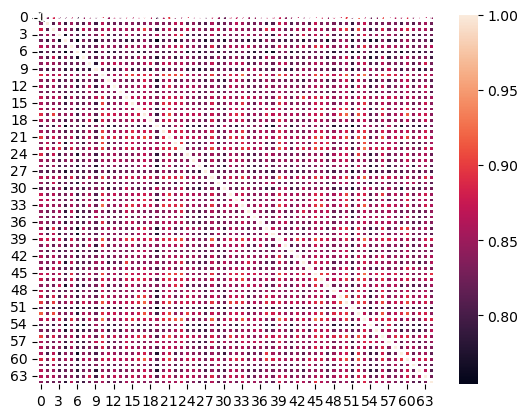

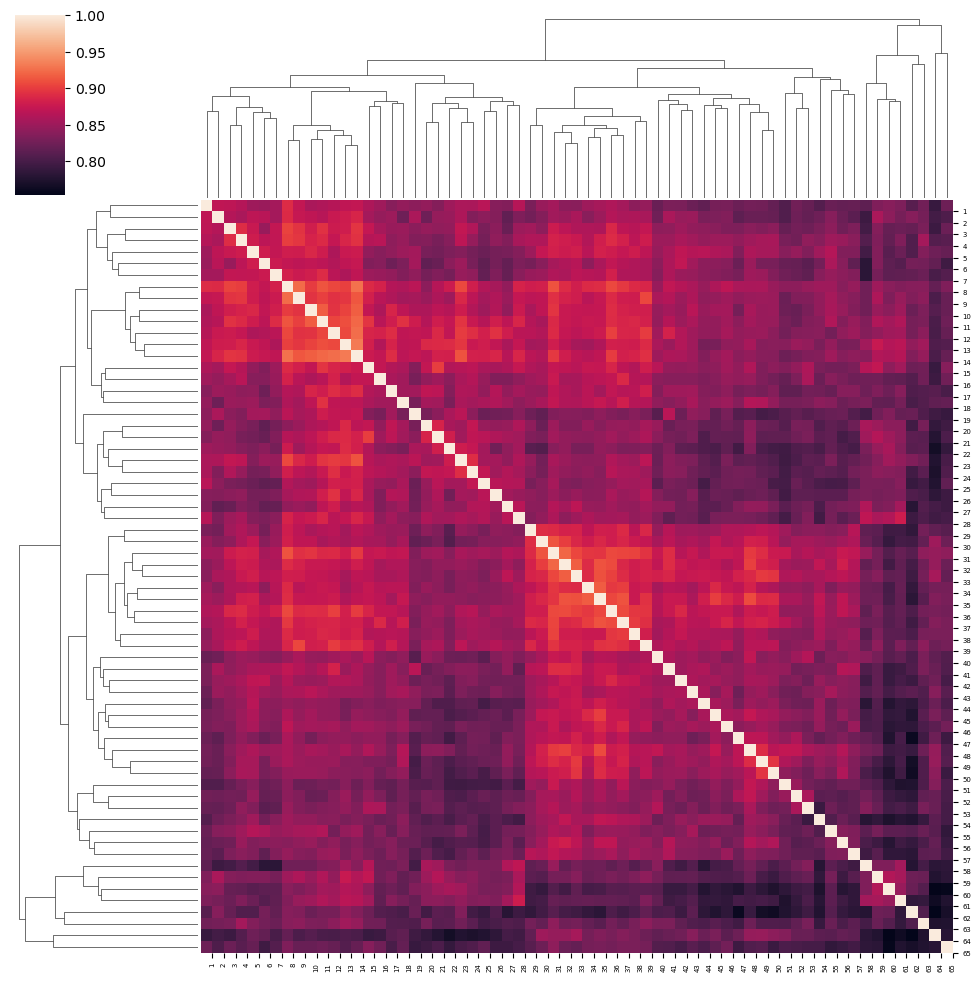

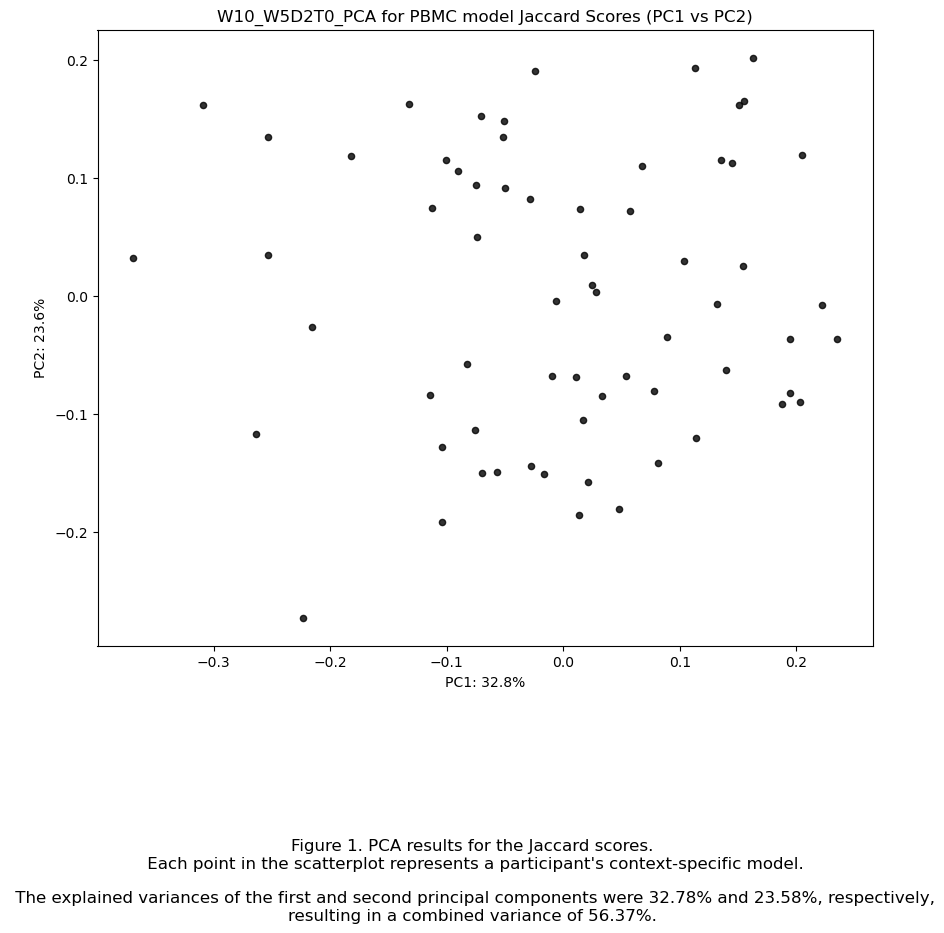

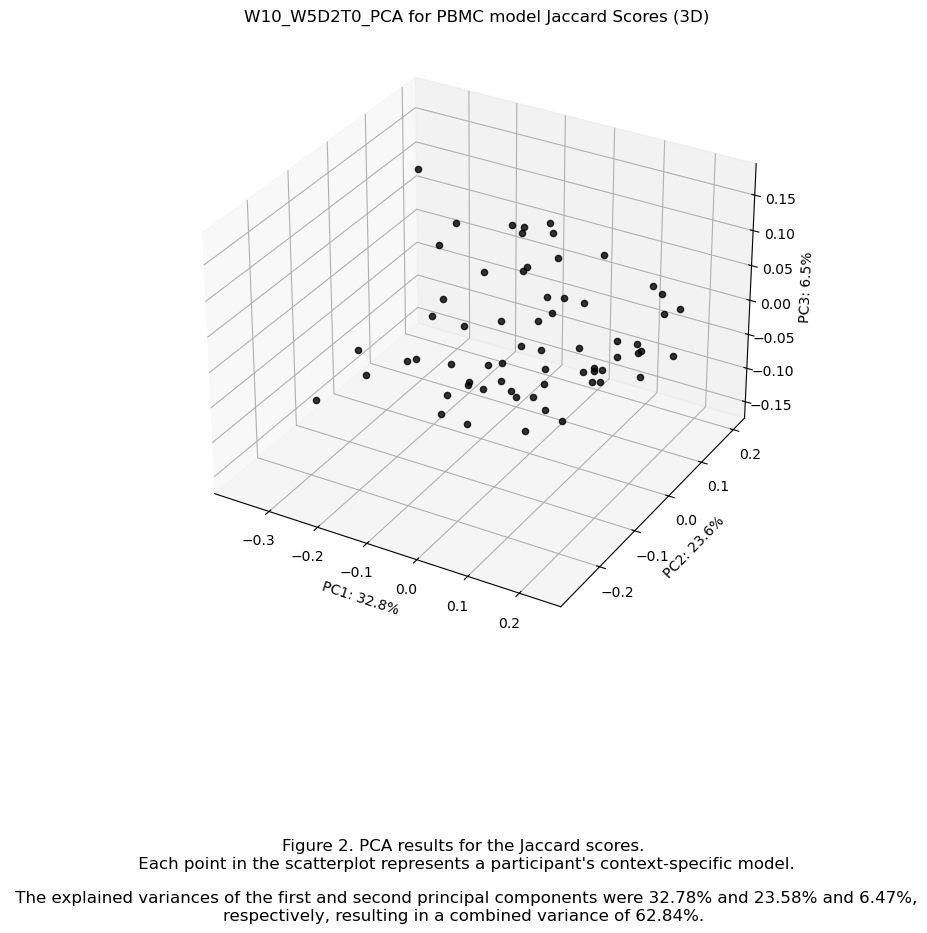

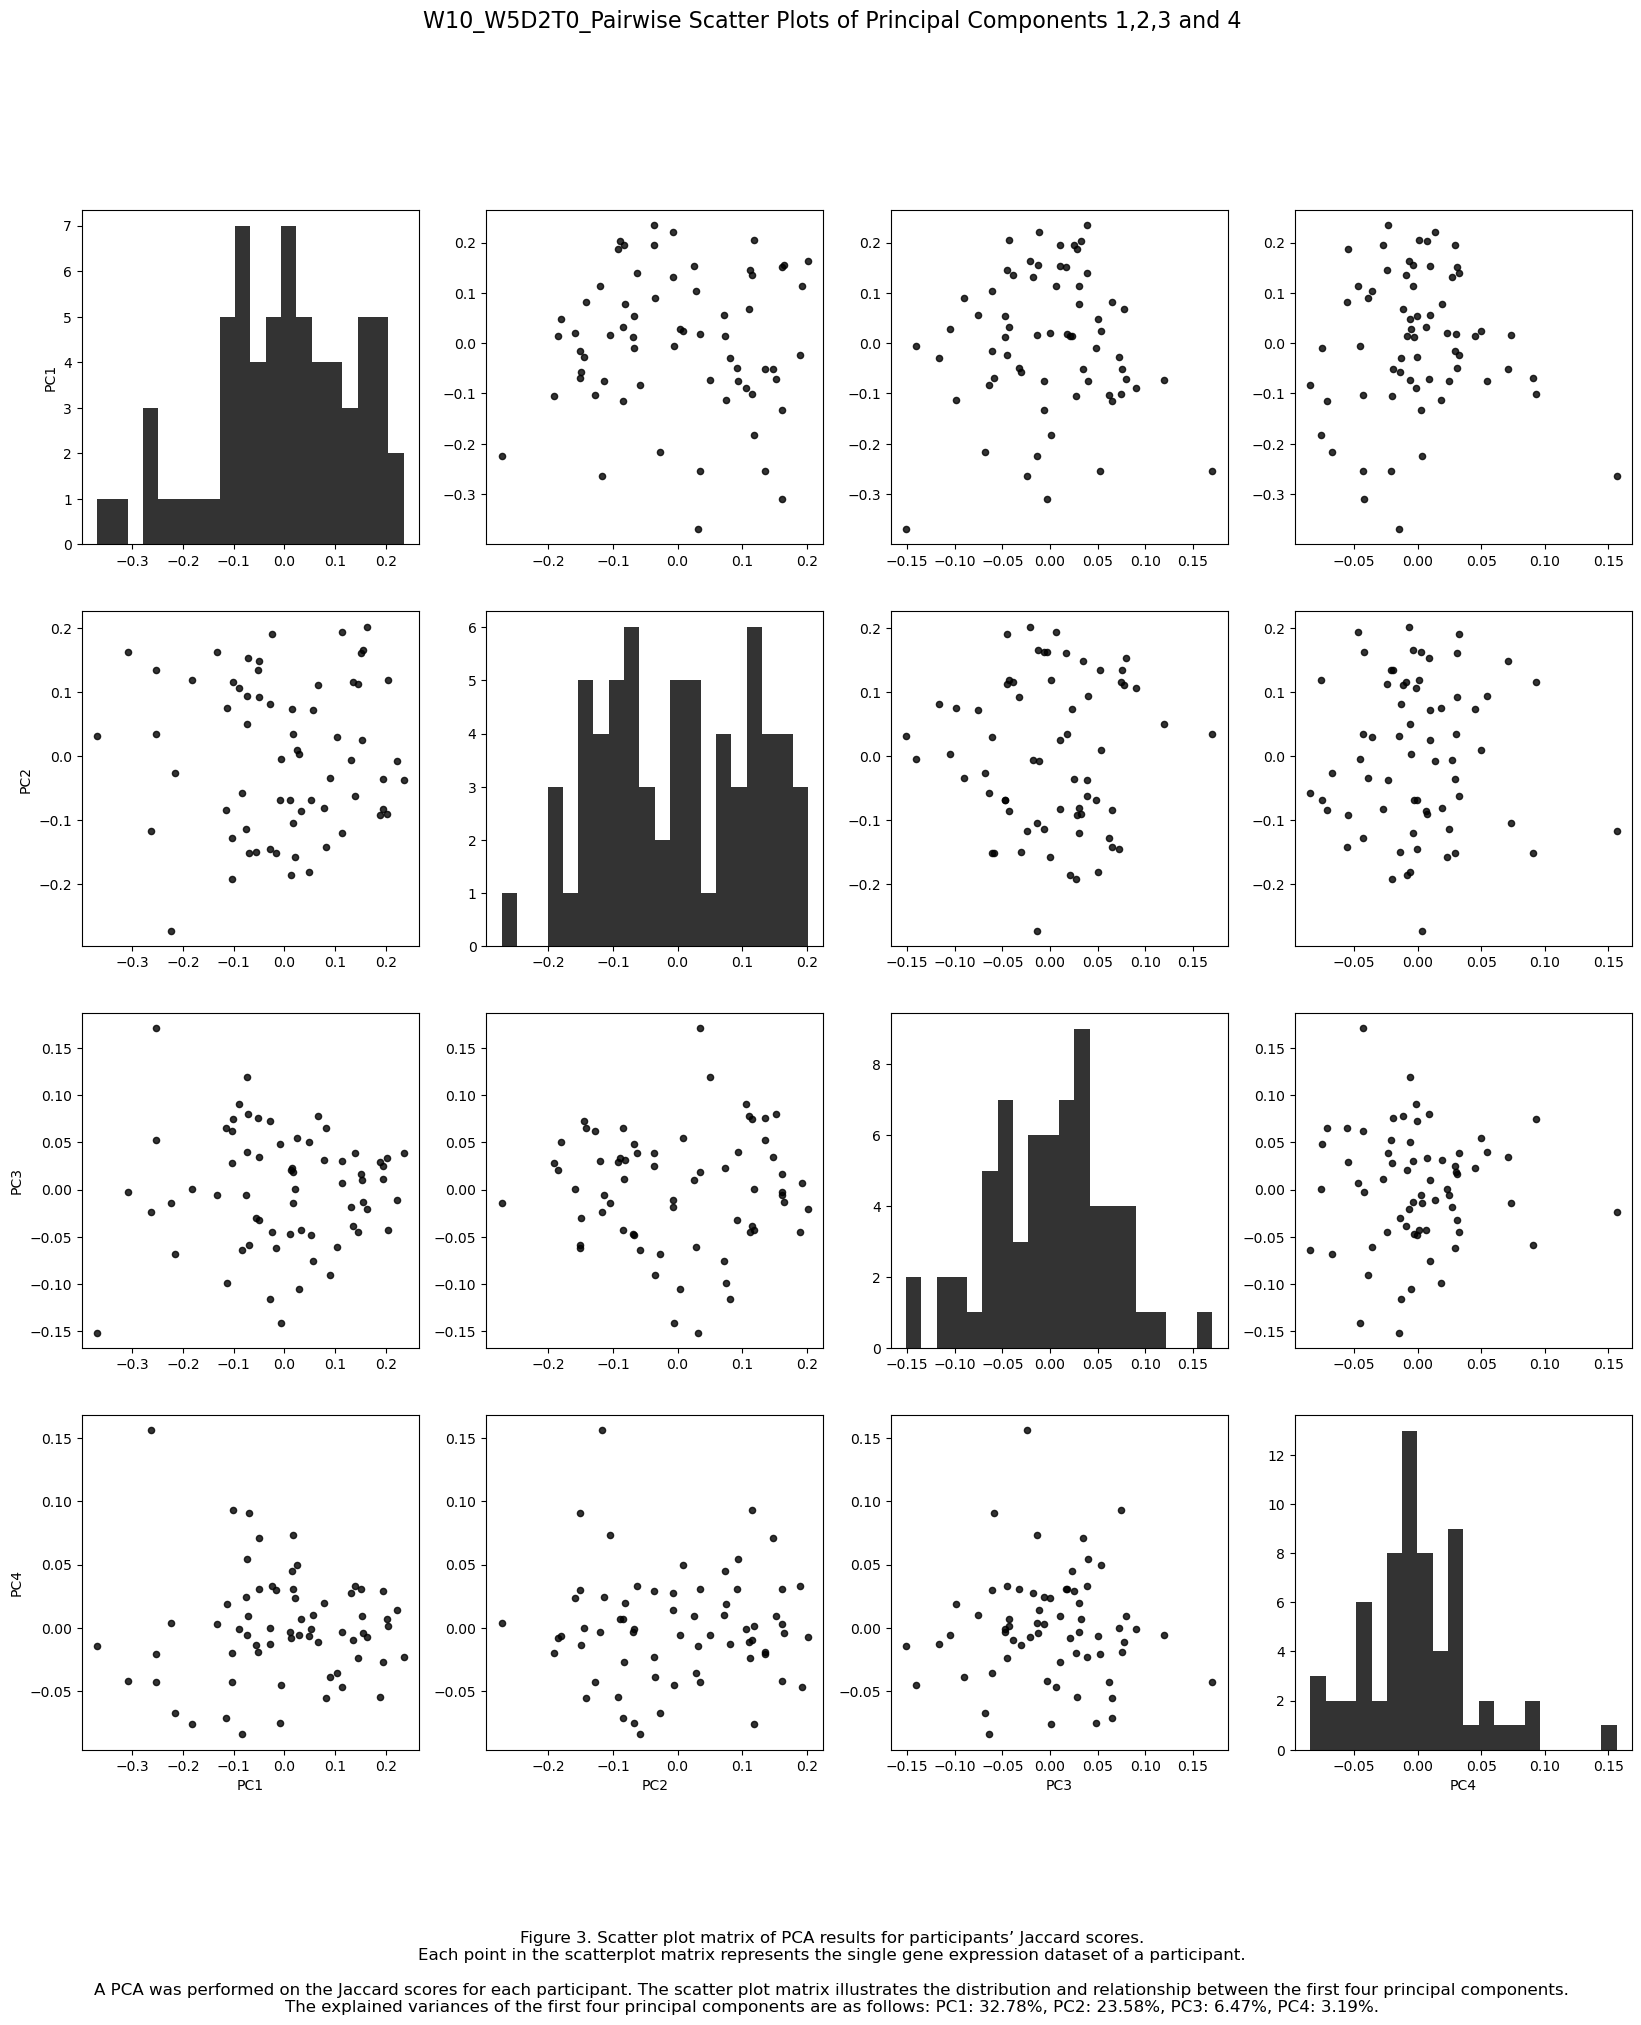

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    monocyteJaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'W10_W5D2T0_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T0_JaccardScore.mat')['JaccardScore']

# Define labels
labels = [str(i) for i in range(1, 66)]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, 66), xticks=np.arange(1, 66))
g.ax_heatmap.set_xticklabels(labels, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 8))
annotations = []
for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    clu = plt.scatter(xs, ys, s=20, marker='o', color='black', alpha=0.8)

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color='black', alpha=0.8)

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4


# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T0_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_


fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(components[i], bins=20, color='black', alpha=0.8)
        else:
            axs[i, j].scatter(components[j], components[i], color='black', s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()

### Additional code to add data 

In [9]:

"""
# Colored according to sex
fig, axes = plt.subplots(nrows=1, ncols=1)
female_indices = [2, 3, 8, 9, 10, 11, 14, 15, 17, 22, 23, 24, 25, 30, 28, 29, 31, 32, 34, 38, 40, 41, 42, 43, 46, 50, 51, 55, 57, 62, 64, 67, 69, 71]
male_indices = [1, 4, 5, 6, 7, 12, 13, 16, 18, 19, 20, 21, 26, 27, 33, 35, 36, 37, 39, 44, 45, 47, 48, 49, 52, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 68, 70]

for i in female_indices:
    xf = pcaData[i-1, 0]
    yf = pcaData[i-1, 1]
    clu_f = plt.scatter(xf, yf, s=20, marker='o', color='darkorange', alpha=0.8)

for j in male_indices:
    xt = pcaData[j-1, 0]
    yt = pcaData[j-1, 1]
    clu_m = plt.scatter(xt, yt, s=20, marker='o', color='steelblue', alpha=0.8)

plt.title('PCA for Jaccard Scores Between Monocyte Models', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.legend([clu_f, clu_m], ['Female', 'Male'])


# Colored according to age
fig, axes = plt.subplots(nrows=1, ncols=1)
age_50_indices = [53, 2, 18, 29, 11, 65, 67, 63, 51]
age_54_indices = [17, 25, 13, 5, 50, 9, 44, 59, 66, 4, 16, 28, 70, 55]
age_61_indices = [8, 39, 61, 34, 71, 22, 35, 58, 68, 46, 6, 21, 40, 3, 23, 1, 32, 69]
age_62_indices = [14, 24, 36, 47, 49, 52, 60, 12, 31, 57, 64, 10, 15, 30, 33, 54, 20, 38, 41, 62, 48, 56, 7, 19, 26, 27, 42, 37, 45, 43]

for i in age_50_indices:
    x_50 = pcaData[i-1, 0]
    y_50 = pcaData[i-1, 1]
    clu_50 = plt.scatter(x_50, y_50, s=20, marker='o', color='darkorange', alpha=0.8)

for j in age_54_indices:
    x_54 = pcaData[j-1, 0]
    y_54 = pcaData[j-1, 1]
    clu_54 = plt.scatter(x_54, y_54, s=20, marker='o', color='olivedrab', alpha=0.8)

for j in age_61_indices:
    x_61 = pcaData[j-1, 0]
    y_61 = pcaData[j-1, 1]
    clu_61 = plt.scatter(x_61, y_61, s=20, marker='o', color='steelblue', alpha=0.8)

for j in age_62_indices:
    x_62 = pcaData[j-1, 0]
    y_62 = pcaData[j-1, 1]
    clu_62 = plt.scatter(x_62, y_62, s=20, marker='o', color='purple', alpha=0.8)

plt.title('PCA for Jaccard Scores Between Monocyte Models', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.legend([clu_50, clu_54, clu_61, clu_62], ['50-53', '54-57', '58-61', '62-65'])


# Colored according to medication/supplement use
fig, axes = plt.subplots(nrows=1, ncols=1)
no_medication_indices = [5, 6, 9, 11, 16, 17, 18, 19, 20, 25, 26, 27, 29, 30, 33, 49, 50, 53, 56, 57, 59, 63, 65, 66, 69, 70]
medication_indices = [1, 2, 3, 4, 7, 8, 10, 12, 13, 14, 15, 21, 22, 23, 24, 28, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 54, 55, 58, 60, 61, 62, 64, 67, 68, 71]

for i in no_medication_indices:
    x_none = pcaData[i-1, 0]
    y_none = pcaData[i-1, 1]
    clu_none = plt.scatter(x_none, y_none, s=20, marker='o', color='darkorange', alpha=0.8)

for j in medication_indices:
    x_uses = pcaData[j-1, 0]
    y_uses = pcaData[j-1, 1]
    clu_uses = plt.scatter(x_uses, y_uses, s=20, marker='o', color='steelblue', alpha=0.8)

plt.title('PCA for Jaccard Scores Between Monocyte Models', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.legend([clu_none, clu_uses], ['No Medication or Supplement Usage', 'Uses Medication or Supplement'])
plt.show()


# Colored according to BMI
fig, axes = plt.subplots(nrows=1, ncols=1)
overweight_indices = [29, 22, 11, 8, 37, 13, 9, 52, 57, 12, 47, 67, 14, 19, 25, 60, 31, 16, 21, 1, 3, 62, 17, 56, 54, 15, 6, 71, 45, 66, 7, 70, 28, 48, 65, 36, 20, 5]
obese_indices = [24, 63, 53, 35, 44, 46, 30, 42, 39, 41, 58, 64, 26, 32, 2, 51, 33, 40, 34, 18, 27, 61, 49, 38, 10, 50, 4, 43, 59, 69, 3, 55, 68]

for i in overweight_indices:
    x_ov = pcaData[i-1, 0]
    y_ov = pcaData[i-1, 1]
    clu_ov = plt.scatter(x_ov, y_ov, s=20, marker='o', color='darkorange', alpha=0.8)

for j in obese_indices:
    x_ob = pcaData[j-1, 0]
    y_ob = pcaData[j-1, 1]
    clu_ob = plt.scatter(x_ob, y_ob, s=20, marker='o', color='steelblue', alpha=0.8)

plt.title('PCA for Jaccard Scores Between Monocyte Models', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.legend([clu_ov, clu_ob], ['Overweight', 'Obese'])
plt.show()

"""

"\n# Colored according to sex\nfig, axes = plt.subplots(nrows=1, ncols=1)\nfemale_indices = [2, 3, 8, 9, 10, 11, 14, 15, 17, 22, 23, 24, 25, 30, 28, 29, 31, 32, 34, 38, 40, 41, 42, 43, 46, 50, 51, 55, 57, 62, 64, 67, 69, 71]\nmale_indices = [1, 4, 5, 6, 7, 12, 13, 16, 18, 19, 20, 21, 26, 27, 33, 35, 36, 37, 39, 44, 45, 47, 48, 49, 52, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 68, 70]\n\nfor i in female_indices:\n    xf = pcaData[i-1, 0]\n    yf = pcaData[i-1, 1]\n    clu_f = plt.scatter(xf, yf, s=20, marker='o', color='darkorange', alpha=0.8)\n\nfor j in male_indices:\n    xt = pcaData[j-1, 0]\n    yt = pcaData[j-1, 1]\n    clu_m = plt.scatter(xt, yt, s=20, marker='o', color='steelblue', alpha=0.8)\n\nplt.title('PCA for Jaccard Scores Between Monocyte Models', title_font)\nplt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)\nplt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)\nplt.legend([clu_f, clu_m], ['Female', 'Male'])\n\n\n# Colore

# Check if Jaccard matrix works

In [2]:
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import loadmat, savemat

# Directory containing the .mat files
directory_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0'
# Load the Jaccard score matrix
jaccard_score_matrix = loadmat('Week10_W5D2T0_JaccardScore.mat')['JaccardScore']

# Load models from the directory
context_specific_models = []
for filename in os.listdir(directory_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path, filename)
        model = load_matlab_model(file_path)
        context_specific_models.append(model)

print(f"Loaded {len(context_specific_models)} models.")

# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 65 models.


In [3]:
# Ask the user for the indices of the models to compare
model_index_1 = int(input("Enter the index of the first model to compare (1-71): ")) - 1
model_index_2 = int(input("Enter the index of the second model to compare (1-71): ")) - 1

# Ensure the indices are within the valid range
if model_index_1 < 0 or model_index_1 >= len(context_specific_models) or model_index_2 < 0 or model_index_2 >= len(context_specific_models):
    print("Invalid indices. Please enter indices between 1 and 71.")
else:
    # Extract the selected models
    model_1 = context_specific_models[model_index_1]
    model_2 = context_specific_models[model_index_2]


        # Extract reaction sets
    reactions_1 = set([rxn.id for rxn in model_1.reactions])
    reactions_2 = set([rxn.id for rxn in model_2.reactions])

    # Manually calculate the Jaccard index
    manual_jaccard_index = jaccard_index(reactions_1, reactions_2)
    print(f"Manual Jaccard Index between model {model_index_1 + 1} and model {model_index_2 + 1}: {manual_jaccard_index}")

    # Retrieve the Jaccard index from the matrix
    matrix_jaccard_index = jaccard_score_matrix[model_index_1, model_index_2]
    print(f"Matrix Jaccard Index between model {model_index_1 + 1} and model {model_index_2 + 1}: {matrix_jaccard_index}")

    # Compare the two values
    if np.isclose(manual_jaccard_index, matrix_jaccard_index):
        print("The Jaccard index calculation is correct.")
    else:
        print("There is a discrepancy in the Jaccard index calculation.")

Enter the index of the first model to compare (1-71):  1
Enter the index of the second model to compare (1-71):  2


Manual Jaccard Index between model 1 and model 2: 0.834717971141233
Matrix Jaccard Index between model 1 and model 2: 0.834717971141233
The Jaccard index calculation is correct.


# 2. W5D2T120 Jaccard distance heatmaps and PCA plots¶

No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 65 models.
Jaccard distance matrix calculated.
[[1.         0.83153813 0.82887231 ... 0.81427343 0.85526316 0.84503311]
 [0.83153813 1.         0.82069268 ... 0.82905611 0.83580139 0.88245931]
 [0.82887231 0.82069268 1.         ... 0.85675676 0.83074878 0.84995467]
 ...
 [0.81427343 0.82905611 0.85675676 ... 1.         0.80890618 0.87182971]
 [0.85526316 0.83580139 0.83074878 ... 0.80890618 1.         0.82189974]
 [0.84503311 0.88245931 0.84995467 ... 0.87182971 0.82189974 1.        ]]
Jaccard scores saved to Week10_W5D2T120_JaccardScore.mat.
[0.35699812 0.12744119 0.09334279]


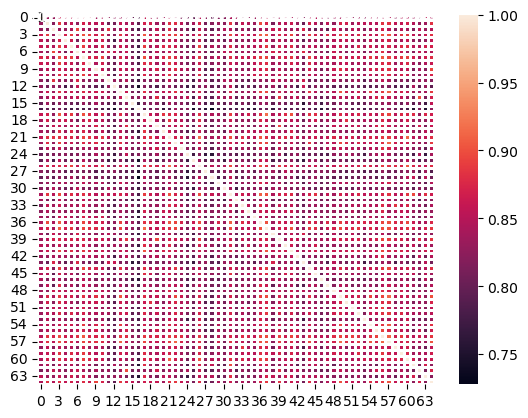

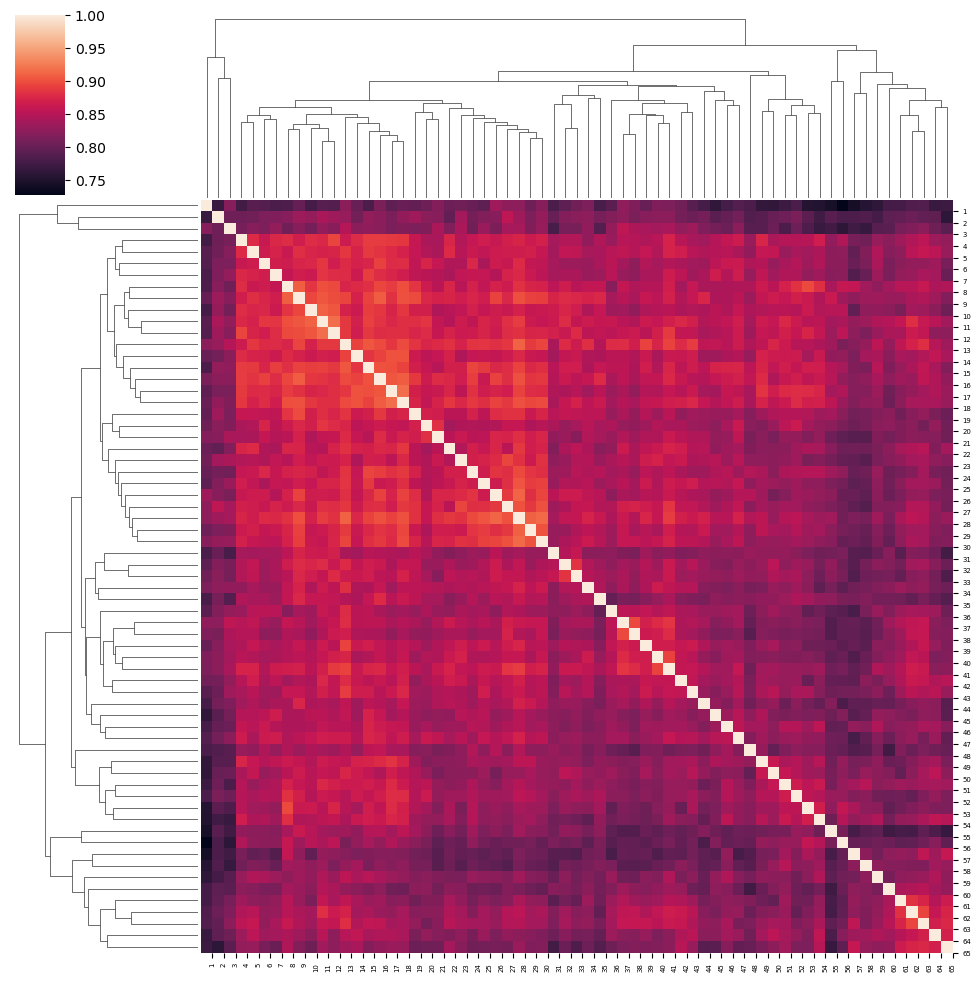

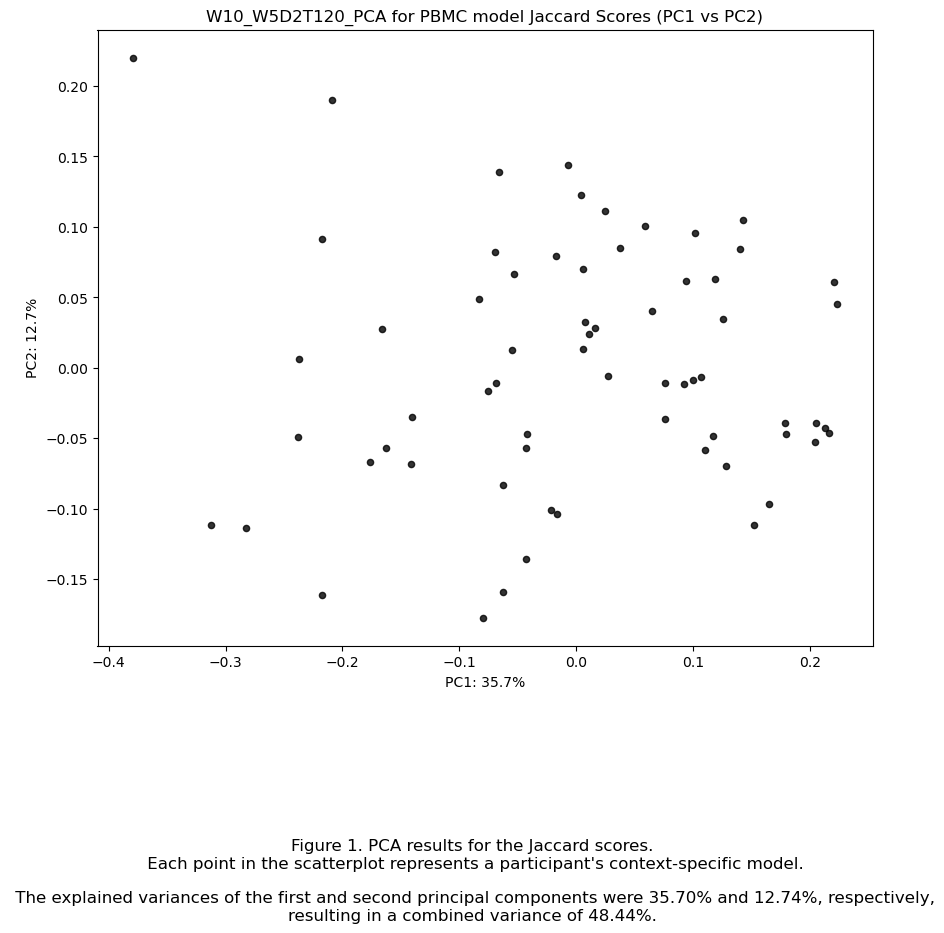

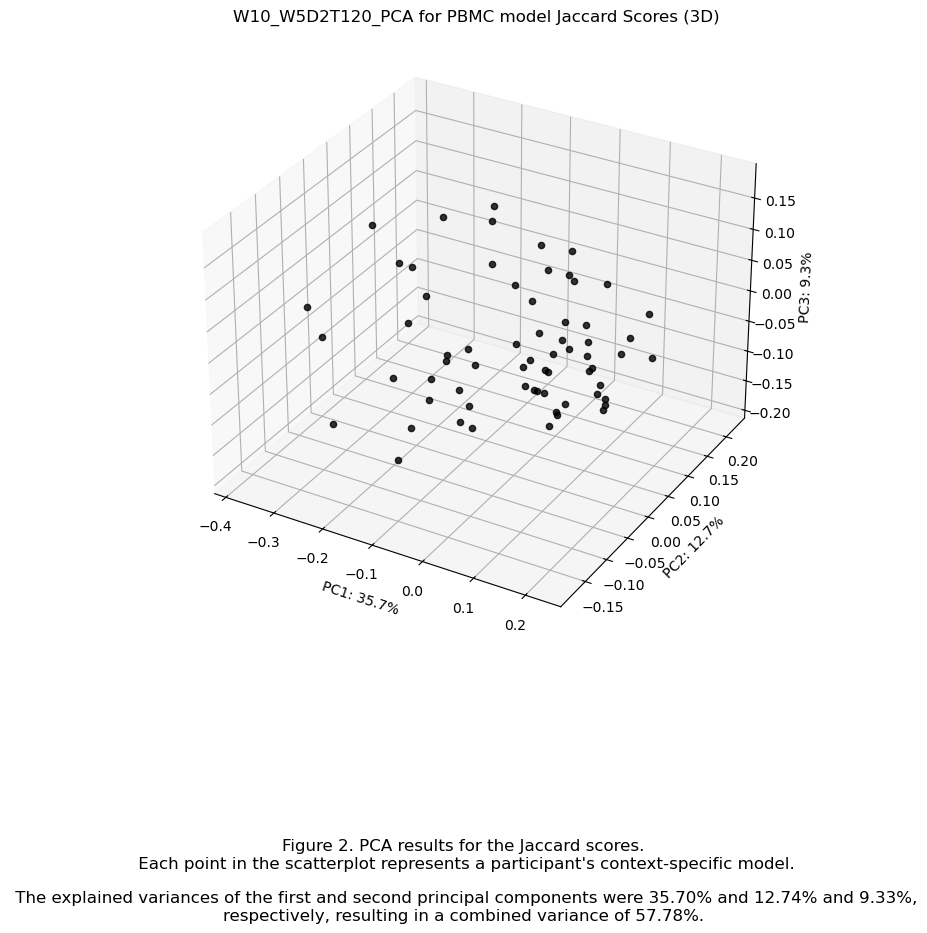

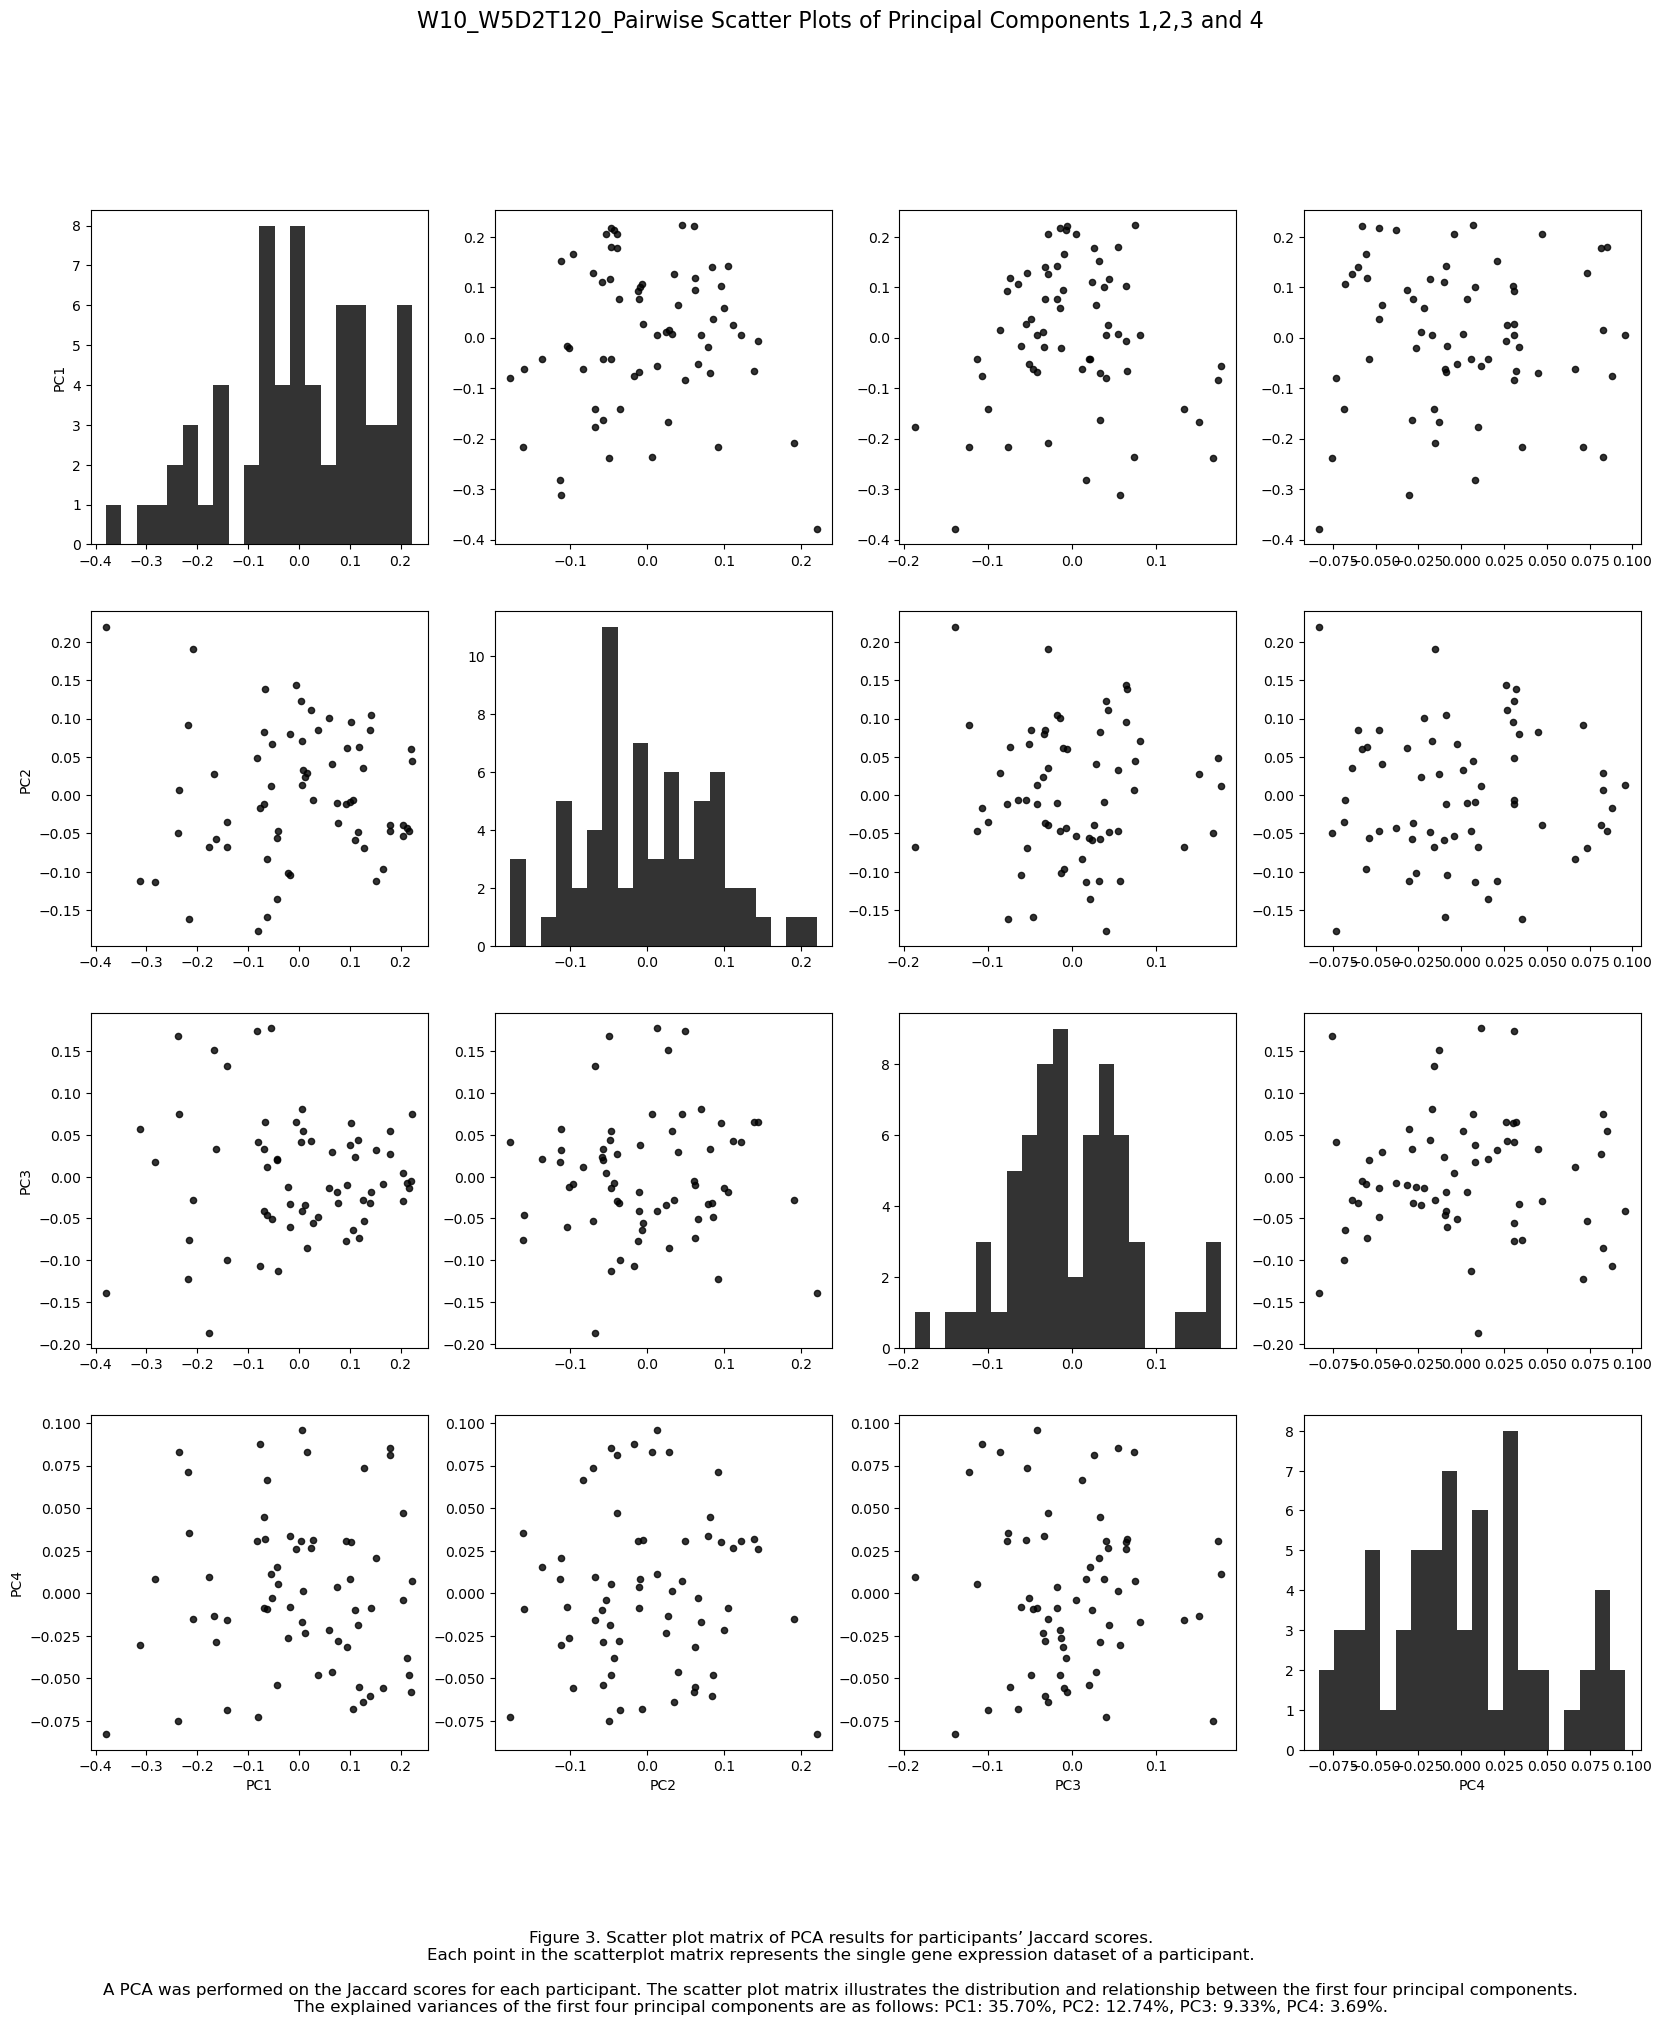

In [4]:
# Load all models 
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat

# Directory containing the .mat files
directory_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T120'

# Load all models from the directory
context_specific_models = []
for filename in os.listdir(directory_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path, filename)
        model = load_matlab_model(file_path)
        context_specific_models.append(model)

print(f"Loaded {len(context_specific_models)} models.")


########################### Calculate jaccard distance 
# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D2T120_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")


########################### Heat maps and plots 

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    monocyteJaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'W10_W5D2T120_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T120_JaccardScore.mat')['JaccardScore']

# Define labels
labels = [str(i) for i in range(1, 66)]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, 66), xticks=np.arange(1, 66))
g.ax_heatmap.set_xticklabels(labels, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 8))
annotations = []
for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    clu = plt.scatter(xs, ys, s=20, marker='o', color='black', alpha=0.8)

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color='black', alpha=0.8)

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4


# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T120_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_


fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(components[i], bins=20, color='black', alpha=0.8)
        else:
            axs[i, j].scatter(components[j], components[i], color='black', s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()


# 3. W5D2T0 * W5D2T120 Jaccard distance heatmaps and PCA plots¶

## Attempt 1

In [5]:
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat

# Directories containing the .mat files
directory_path1 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0'
directory_path2 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T120'

# Load models from the first directory
models1 = []
for filename in sorted(os.listdir(directory_path1)):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path1, filename)
        model = load_matlab_model(file_path)
        models1.append(model)

# Load models from the second directory
models2 = []
for filename in sorted(os.listdir(directory_path2)):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path2, filename)
        model = load_matlab_model(file_path)
        models2.append(model)

print(f"Loaded {len(models1)} models from directory 1.")
print(f"Loaded {len(models2)} models from directory 2.")



########################### Calculate jaccard distance 
# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Ensure both lists have the same number of models
assert len(models1) == len(models2), "The directories do not contain the same number of models."

# Calculate Jaccard scores between corresponding models
jaccard_scores = []
for model1, model2 in zip(models1, models2):
    reactions1 = set([rxn.id for rxn in model1.reactions])
    reactions2 = set([rxn.id for rxn in model2.reactions])
    score = jaccard_index(reactions1, reactions2)
    jaccard_scores.append(score)

# Convert to a numpy array for saving
jaccard_scores_array = np.array(jaccard_scores)

print("Jaccard scores calculated between corresponding models.")
print(jaccard_scores_array)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_JaccardScore_T0_vs_T120.mat'
savemat(output_file, {'JaccardScore': jaccard_scores_array})
print(f"Jaccard scores saved to {output_file}.")





No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 65 models from directory 1.
Loaded 65 models from directory 2.
Jaccard scores calculated between corresponding models.
[0.84592779 0.85872453 0.85099198 0.84118896 0.89141299 0.89832806
 0.85738832 0.84731834 0.86788256 0.87735004 0.90036397 0.86142485
 0.90831758 0.89886621 0.85100043 0.87920701 0.84036145 0.87848432
 0.81052181 0.85796206 0.87539361 0.91155826 0.89449955 0.83195472
 0.86994345 0.86106195 0.87340097 0.86341463 0.87243338 0.85227273
 0.81538462 0.86035452 0.85850281 0.86891054 0.80915371 0.88434164
 0.87663215 0.84579038 0.88099467 0.92035815 0.88187188 0.83252105
 0.89701149 0.90337494 0.88375224 0.85548387 0.84855041 0.84037559
 0.83411714 0.8478836  0.86704947 0.90054995 0.90136986 0.90089686
 0.86220647 0.8757343  0.83916938 0.88746569 0.92229417 0.86296618
 0.84256816 0.89826642 0.87191011 0.85194919 0.89097408]
Jaccard scores saved to Week10_JaccardScore_T0_vs_T120.mat.


ValueError: The number of observations cannot be determined on an empty distance matrix.

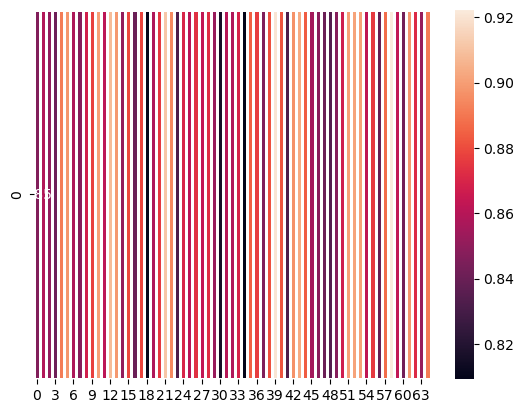

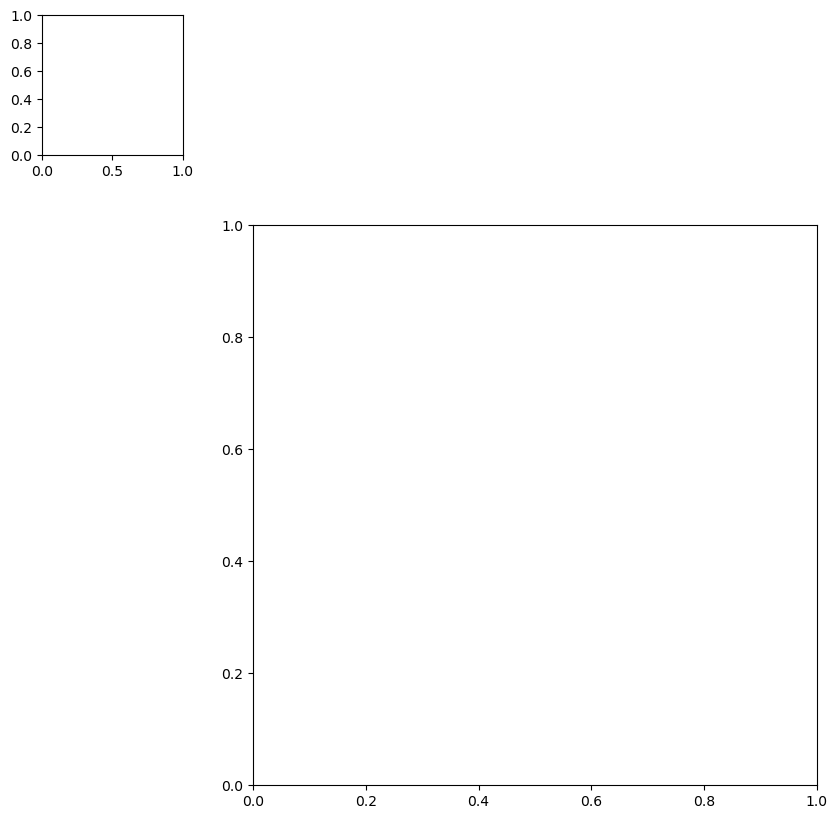

In [13]:
########################### Heat maps and plots 

# -*- coding: utf-8 -*-
"""
Created on Fri Aug 02 22:44:59 2024

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific PBMC models.

INPUT:
    JaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: DW
"""

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'W10_W5D2T0_vs_T120_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_JaccardScore_T0_vs_T120.mat')['JaccardScore']

# Define labels
labels = [str(i) for i in range(1, 66)]
# Define labels
#labels = [str(i) for i in range(1, len(jaccard_scores) + 1)]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, 66), xticks=np.arange(1, 66))
g.ax_heatmap.set_xticklabels(labels, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 8))
annotations = []
for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    clu = plt.scatter(xs, ys, s=20, marker='o', color='black', alpha=0.8)

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color='black', alpha=0.8)

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4


# Load Jaccard scores
jaccardScore = loadmat('Week10_JaccardScore_T0_vs_T120.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_


fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(components[i], bins=20, color='black', alpha=0.8)
        else:
            axs[i, j].scatter(components[j], components[i], color='black', s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()


## Attempt 2

In [1]:
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat, loadmat

# Directories containing the .mat files
directory_path1 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0'
directory_path2 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T120'

# Load all models from directory 1 (T0)
models_T0 = []
filenames_T0 = sorted(os.listdir(directory_path1))
for filename in filenames_T0:
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path1, filename)
        model = load_matlab_model(file_path)
        models_T0.append(model)

# Load all models from directory 2 (T120)
models_T120 = []
filenames_T120 = sorted(os.listdir(directory_path2))
for filename in filenames_T120:
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path2, filename)
        model = load_matlab_model(file_path)
        models_T120.append(model)

print(f"Loaded {len(models_T0)} models from T0.")
print(f"Loaded {len(models_T120)} models from T120.")

# Ensure both directories have the same number of models
assert len(models_T0) == len(models_T120), "The number of models in both directories must be the same."


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 65 models from T0.
Loaded 65 models from T120.


this is how shauna described how to do it , however for heatmaps it is possible to have 0 vs 120 vs 240 all at once, then do 0 vs 120, 120 vs 240, 0 v 240 

In [2]:
# Function to calculate Jaccard index, 
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores between corresponding models from T0 and T120
def calculate_jaccard(models1, models2):
    assert len(models1) == len(models2), "Both model lists must be of the same length."
    num_models = len(models1)
    jaccard_scores = np.zeros(num_models)
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models1[i].reactions])
        reactions_j = set([rxn.id for rxn in models2[i].reactions])
        jaccard_scores[i] = jaccard_index(reactions_i, reactions_j)
    
    return jaccard_scores

# Calculate Jaccard scores for corresponding models
jaccard_scores = calculate_jaccard(models_T0, models_T120)
print("Jaccard distance scores calculated between corresponding models.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_JaccardScore_T0_vs_T120.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")


Jaccard distance scores calculated between corresponding models.
[0.84592779 0.85872453 0.85099198 0.84118896 0.89141299 0.89832806
 0.85738832 0.84731834 0.86788256 0.87735004 0.90036397 0.86142485
 0.90831758 0.89886621 0.85100043 0.87920701 0.84036145 0.87848432
 0.81052181 0.85796206 0.87539361 0.91155826 0.89449955 0.83195472
 0.86994345 0.86106195 0.87340097 0.86341463 0.87243338 0.85227273
 0.81538462 0.86035452 0.85850281 0.86891054 0.80915371 0.88434164
 0.87663215 0.84579038 0.88099467 0.92035815 0.88187188 0.83252105
 0.89701149 0.90337494 0.88375224 0.85548387 0.84855041 0.84037559
 0.83411714 0.8478836  0.86704947 0.90054995 0.90136986 0.90089686
 0.86220647 0.8757343  0.83916938 0.88746569 0.92229417 0.86296618
 0.84256816 0.89826642 0.87191011 0.85194919 0.89097408]
Jaccard scores saved to Week10_JaccardScore_T0_vs_T120.mat.


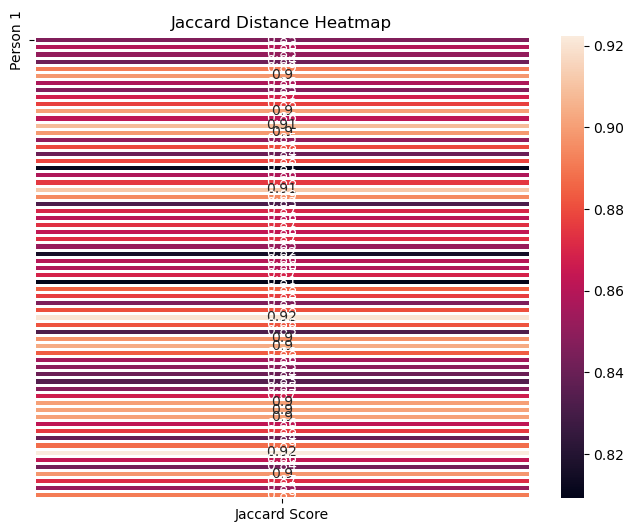

In [9]:
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import seaborn as sns

# Load Jaccard scores
jaccardScore = loadmat('Week10_JaccardScore_T0_vs_T120.mat')['JaccardScore']

# Define labels
labels = [f'Person {i+1}' for i in range(len(jaccardScore))]

################### Plot Jaccard distance heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(jaccardScore.reshape(-1, 1), annot=True, linewidth=1, yticklabels=labels, xticklabels=['Jaccard Score'])
plt.title('Jaccard Distance Heatmap')
#plt.savefig('JaccardHeatmap.png', dpi=300)
plt.show()

[1.]


ValueError: x and y must be the same size

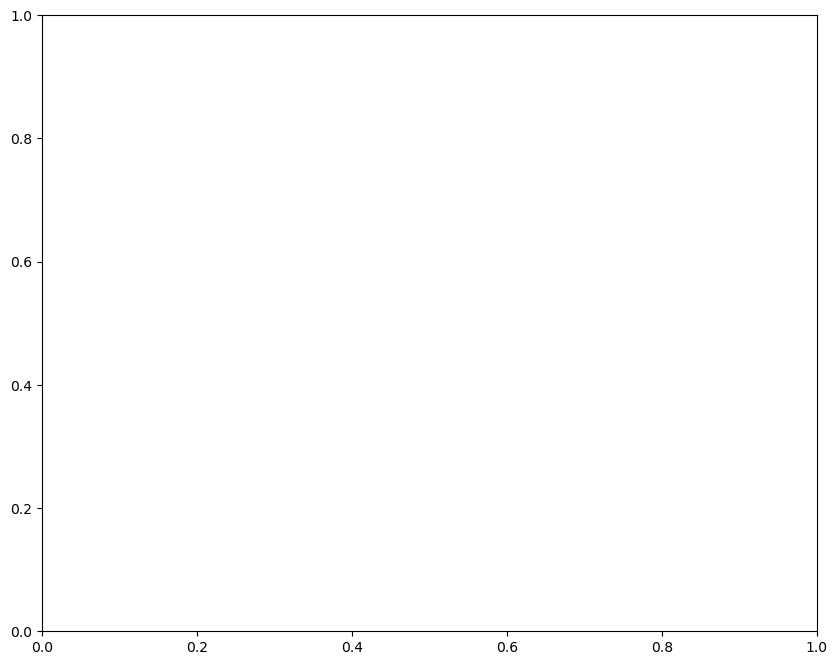

In [12]:
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load Jaccard scores
jaccardScore = loadmat('Week10_JaccardScore_T0_vs_T120.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=1)
pcaData = pca.fit_transform(jaccardScore.reshape(-1, 1))
print(pca.explained_variance_ratio_)

# Define labels
labels = [f'Person {i+1}' for i in range(len(jaccardScore))]

################### Plot 1D PCA scatter plot
plt.figure(figsize=(10, 8))
for i in range(len(labels)):
    plt.scatter(pcaData[i, 0], [0] * len(pcaData), s=50, marker='o', alpha=0.8, label=labels[i])

plt.title('PCA for Jaccard Scores Between T0 and T120 (PC1)')
plt.xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%')
plt.yticks([])
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
#plt.savefig('PCA_1D.png', dpi=300)
plt.show()



# 4. W5D2T* ( All files togethter in 1 folder) Jaccard distance heatmaps and PCA plots¶

No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 130 models.
Jaccard distance matrix calculated.
[[1.         0.83471797 0.86122267 ... 0.83980583 0.83941281 0.89161649]
 [0.83471797 1.         0.8097849  ... 0.82510638 0.83642641 0.8183391 ]
 [0.86122267 0.8097849  1.         ... 0.82300128 0.85526316 0.84503311]
 ...
 [0.83980583 0.82510638 0.82300128 ... 1.         0.84628821 0.83685136]
 [0.83941281 0.83642641 0.85526316 ... 0.84628821 1.         0.82189974]
 [0.89161649 0.8183391  0.84503311 ... 0.83685136 0.82189974 1.        ]]
Jaccard scores saved to Week10_W5D2T*_JaccardScore.mat.


/Users/douglas/anaconda3/envs/cobra_venv/lib/python3.11/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/douglas/anaconda3/envs/cobra_venv/lib/python3.11/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


[0.42267166 0.19002974 0.07300921]


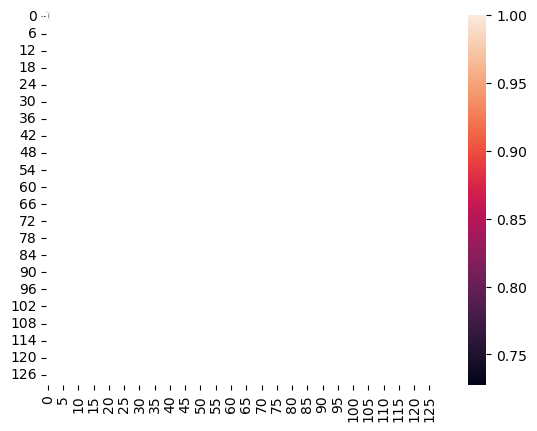

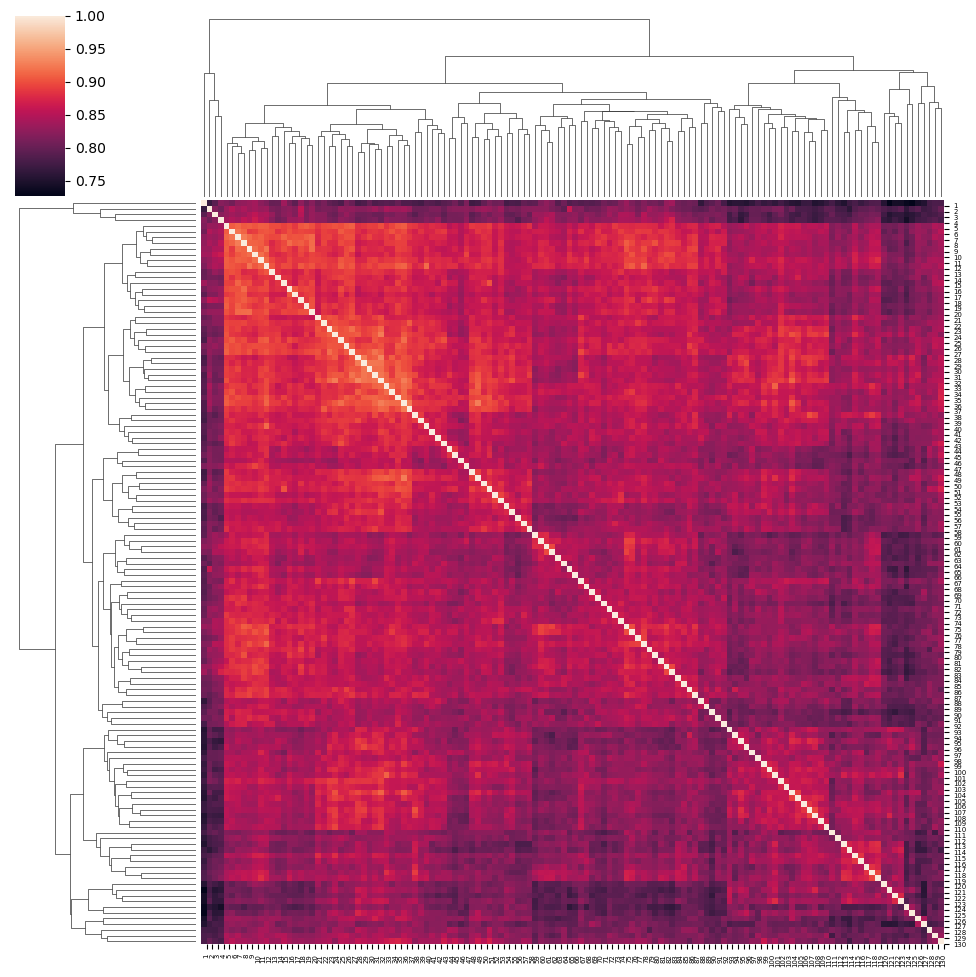

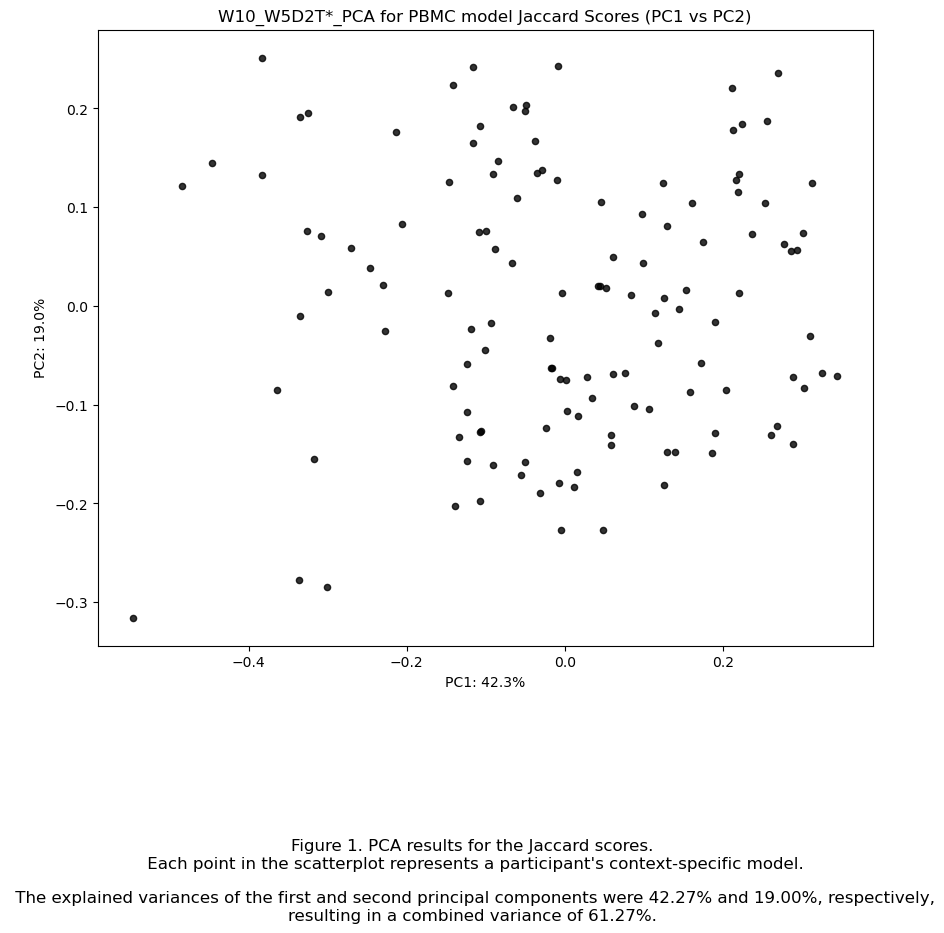

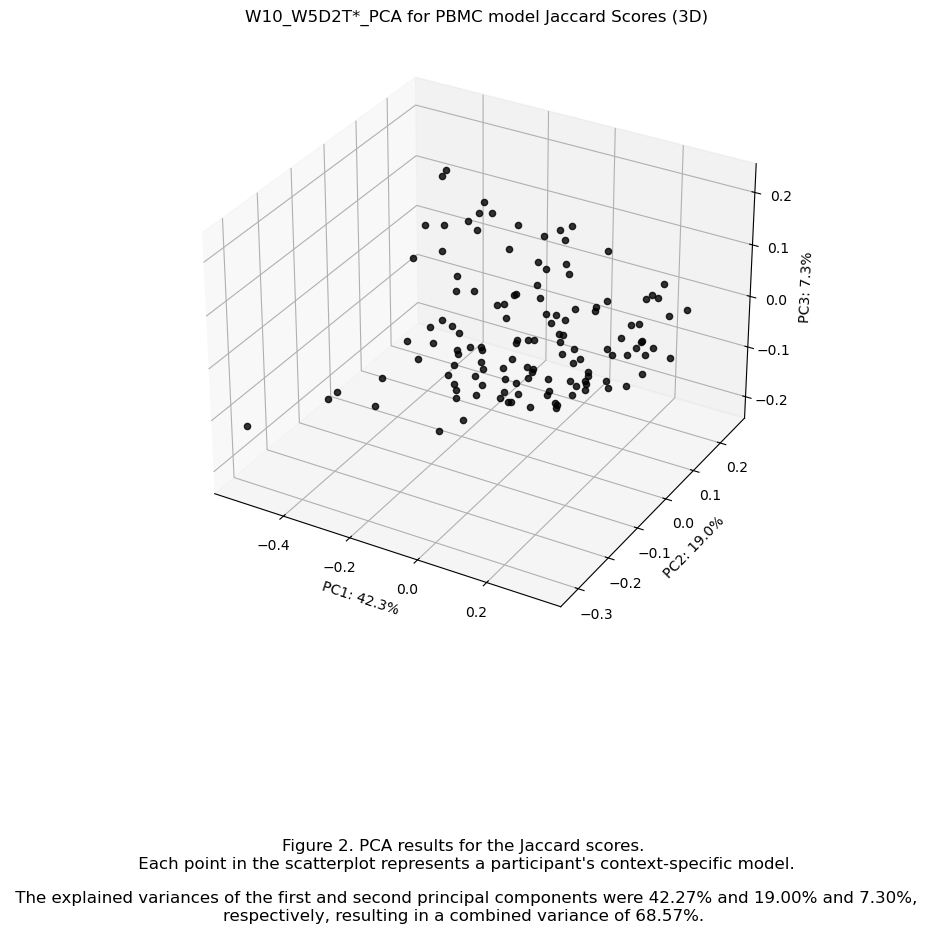

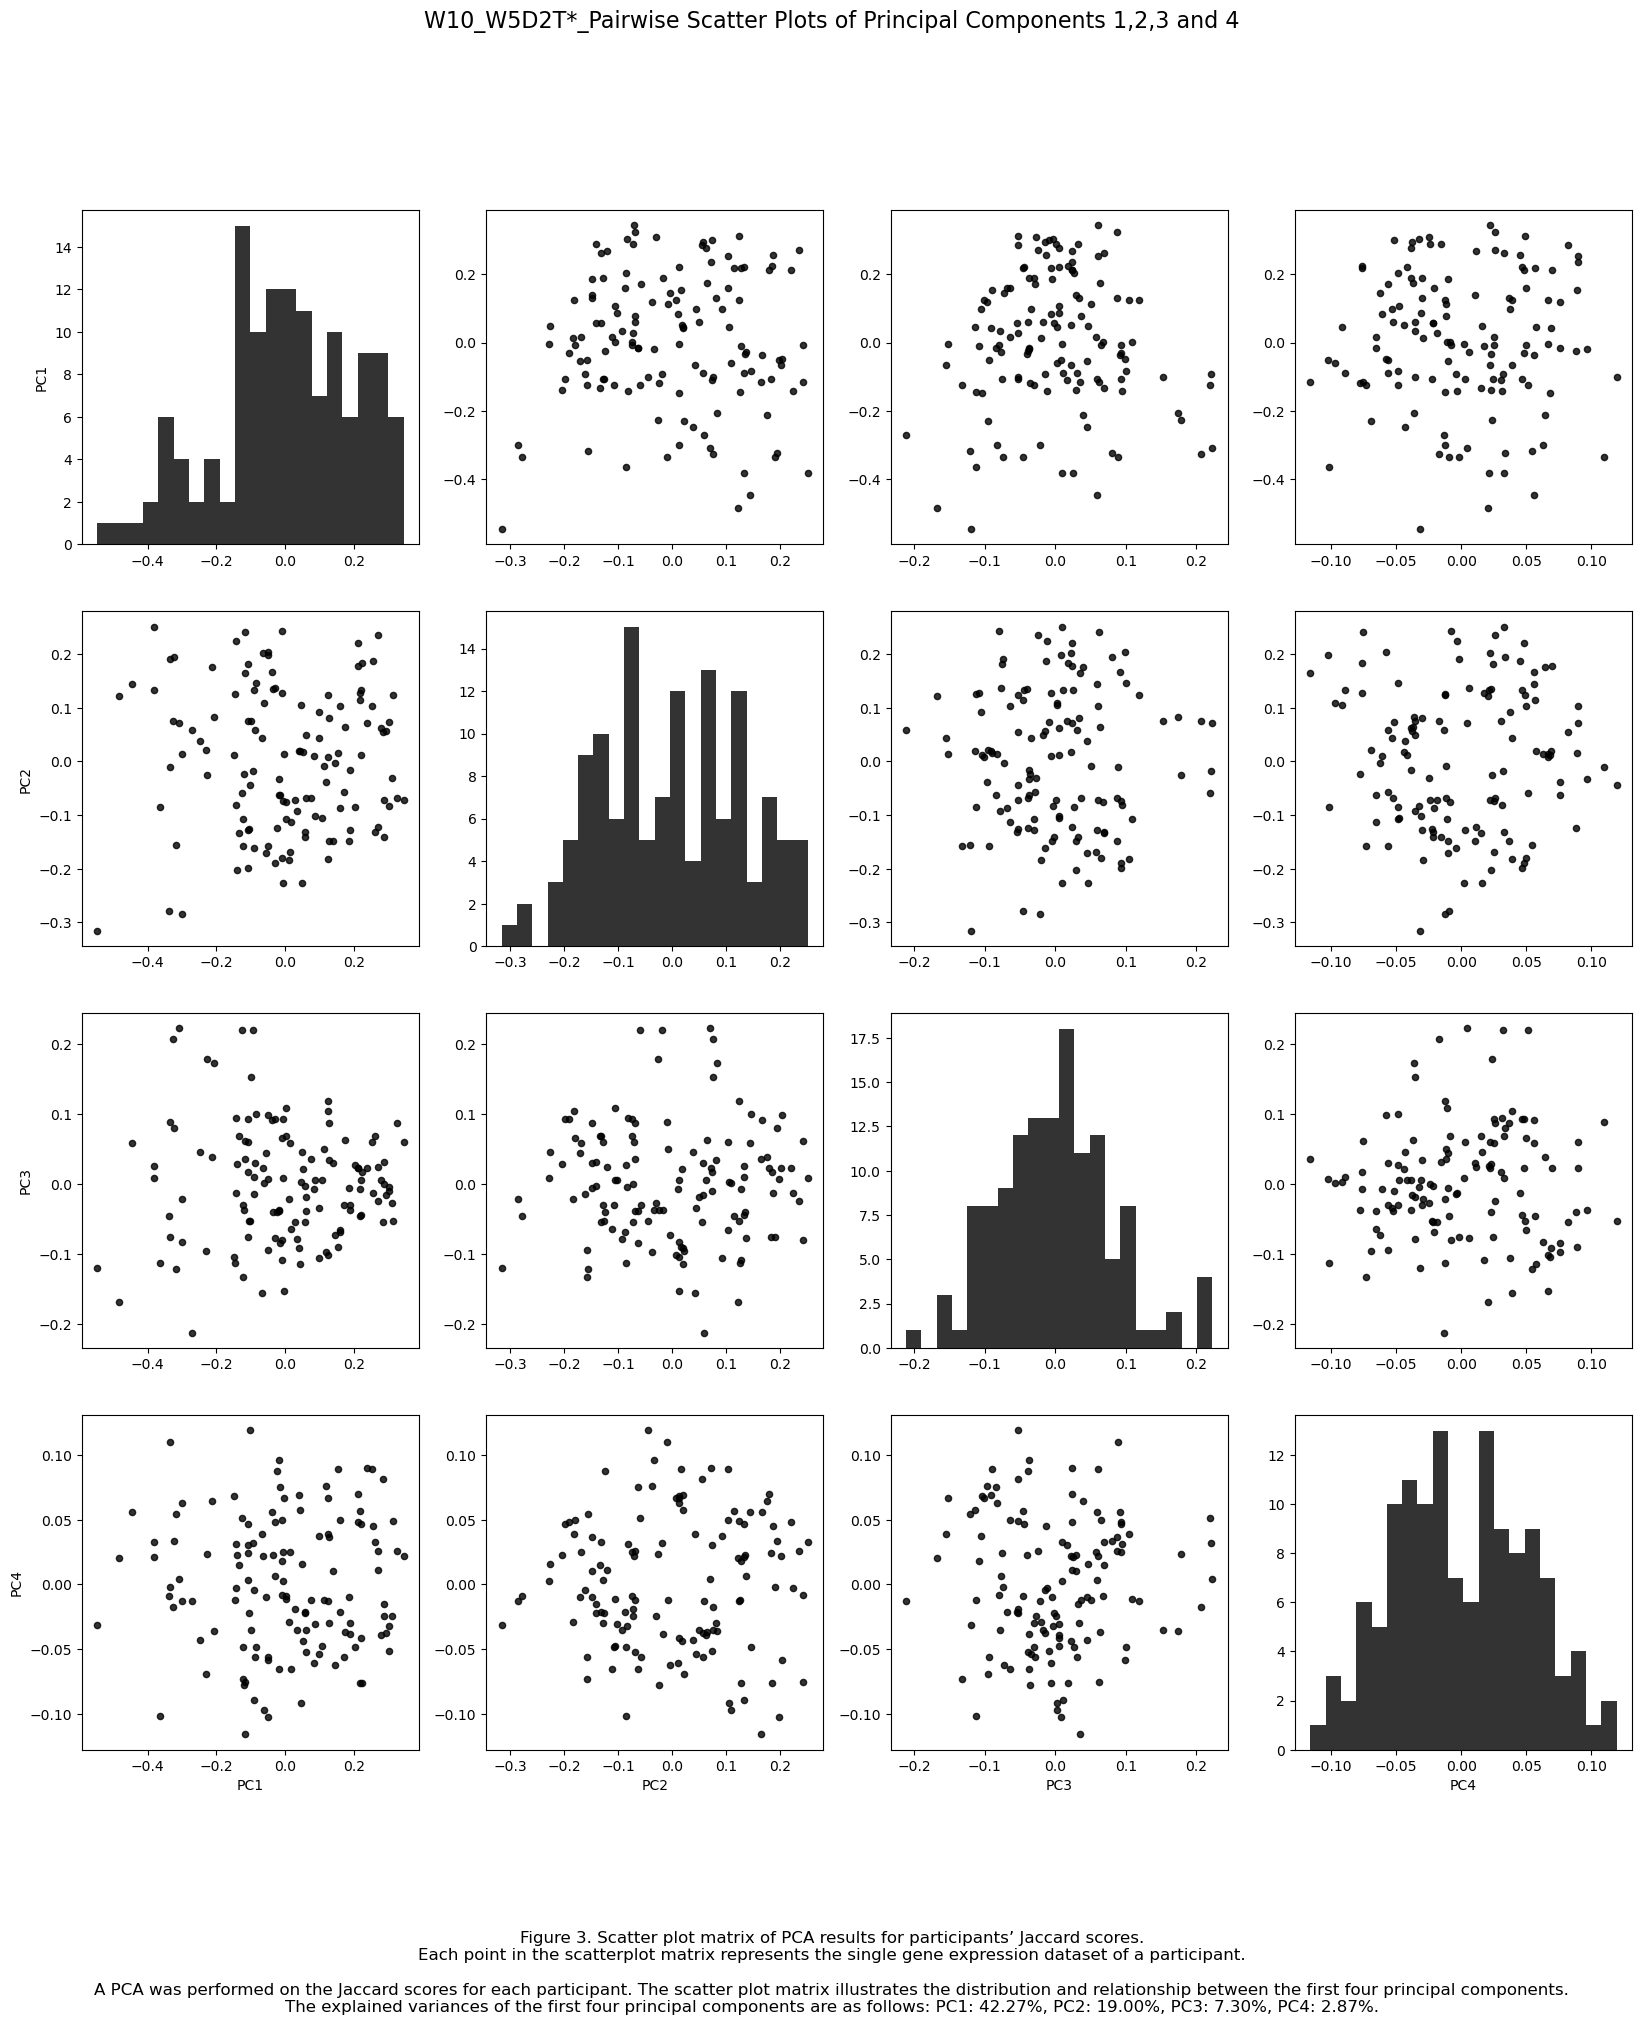

In [1]:
# Load all models 
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat

# Directory containing the .mat files
directory_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T*'

# Load all models from the directory
context_specific_models = []
for filename in os.listdir(directory_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path, filename)
        model = load_matlab_model(file_path)
        context_specific_models.append(model)

print(f"Loaded {len(context_specific_models)} models.")


########################### Calculate jaccard distance 
# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D2T*_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")


########################### Heat maps and plots 

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    monocyteJaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'W10_W5D2T*_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T*_JaccardScore.mat')['JaccardScore']

# Define labels
labels = [str(i) for i in range(1, 131)]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, 131), xticks=np.arange(1, 131))
g.ax_heatmap.set_xticklabels(labels, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 8))
annotations = []
for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    clu = plt.scatter(xs, ys, s=20, marker='o', color='black', alpha=0.8)

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color='black', alpha=0.8)

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4


# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T*_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_


fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(components[i], bins=20, color='black', alpha=0.8)
        else:
            axs[i, j].scatter(components[j], components[i], color='black', s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 65 models from T0.
Loaded 65 models from T120.
Total models loaded: 130
Jaccard distance matrix calculated.
[[1.         0.81218698 0.8206925  ... 0.78455285 0.82075865 0.82749895]
 [0.81218698 1.         0.81398305 ... 0.78664427 0.82571182 0.86865539]
 [0.8206925  0.81398305 1.         ... 0.80978261 0.84612087 0.84615385]
 ...
 [0.78455285 0.78664427 0.80978261 ... 1.         0.81663837 0.82267067]
 [0.82075865 0.82571182 0.84612087 ... 0.81663837 1.         0.85381914]
 [0.82749895 0.86865539 0.84615385 ... 0.82267067 0.85381914 1.        ]]
Jaccard scores saved to Week10_W5D2T*_JaccardScore.mat.


/Users/douglas/anaconda3/envs/cobra_venv/lib/python3.11/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/douglas/anaconda3/envs/cobra_venv/lib/python3.11/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


[0.42267166 0.19002974 0.07300921]


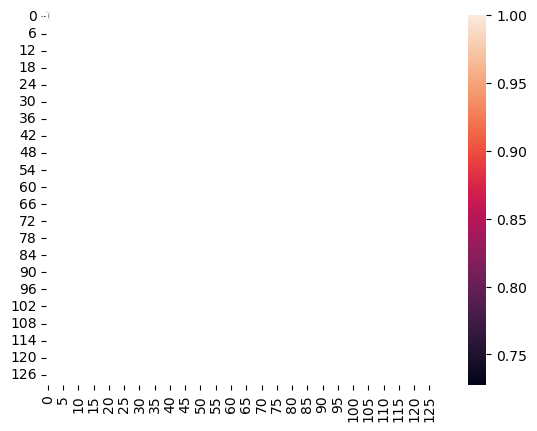

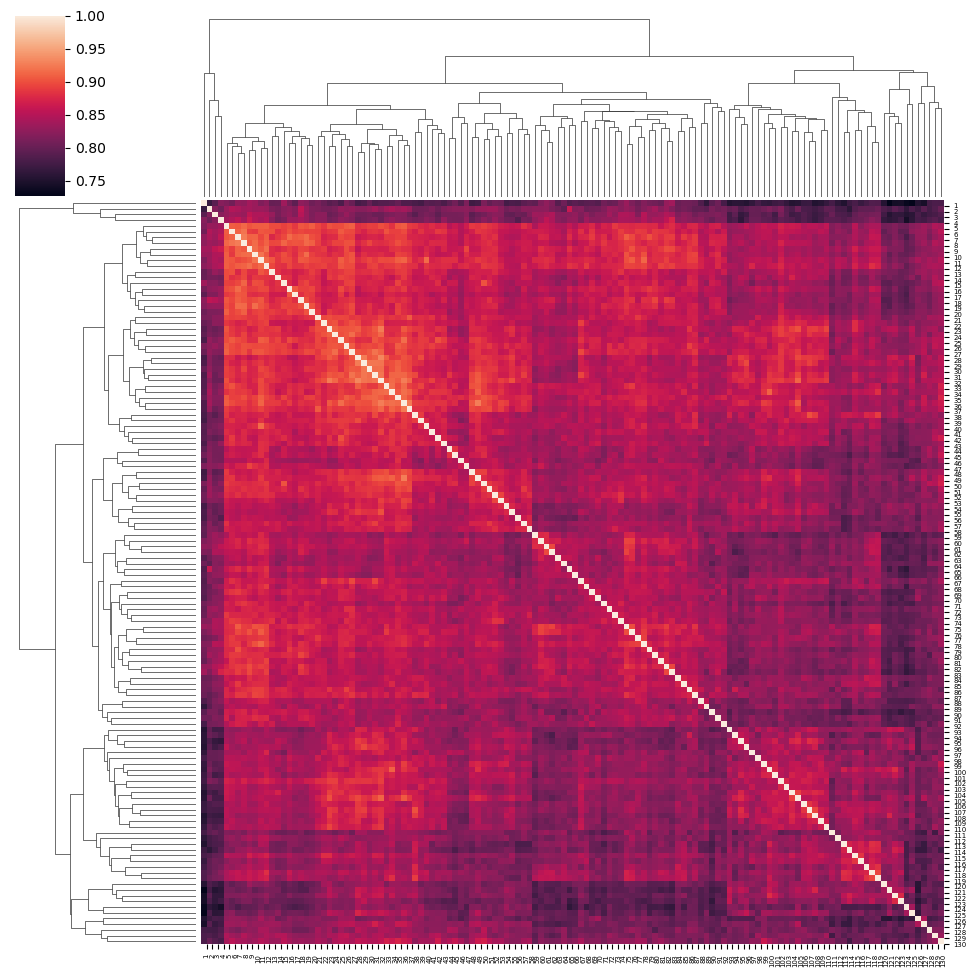

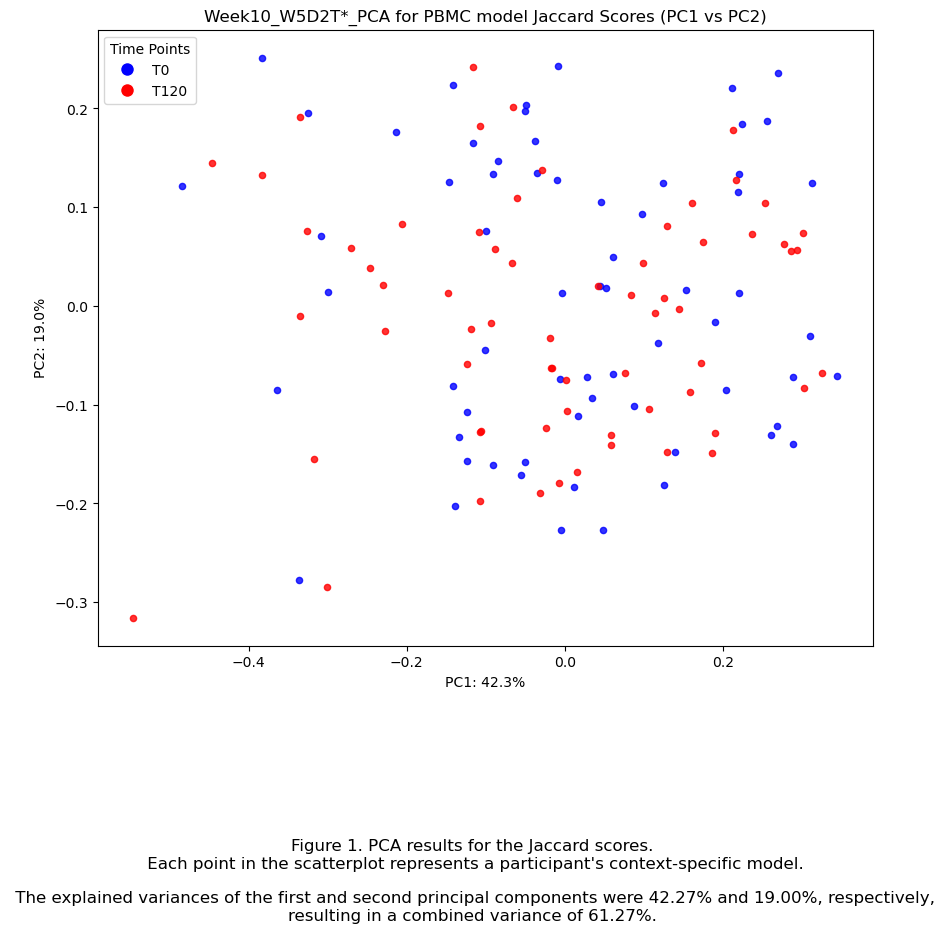

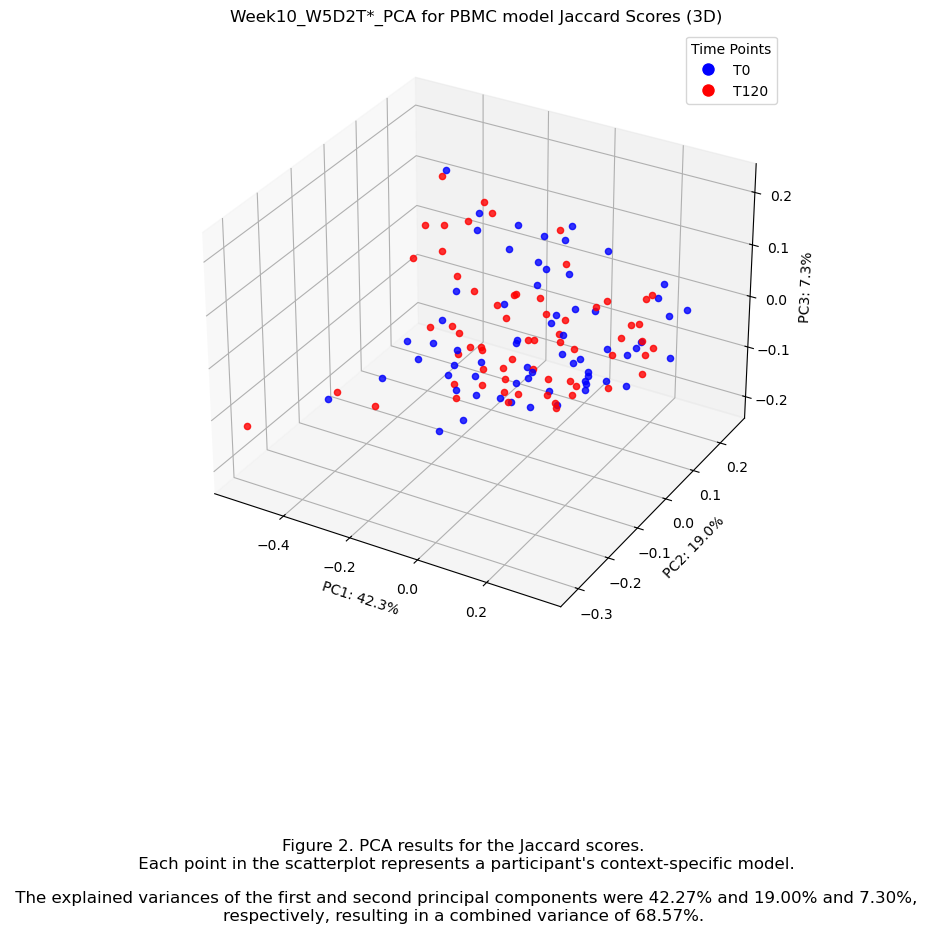

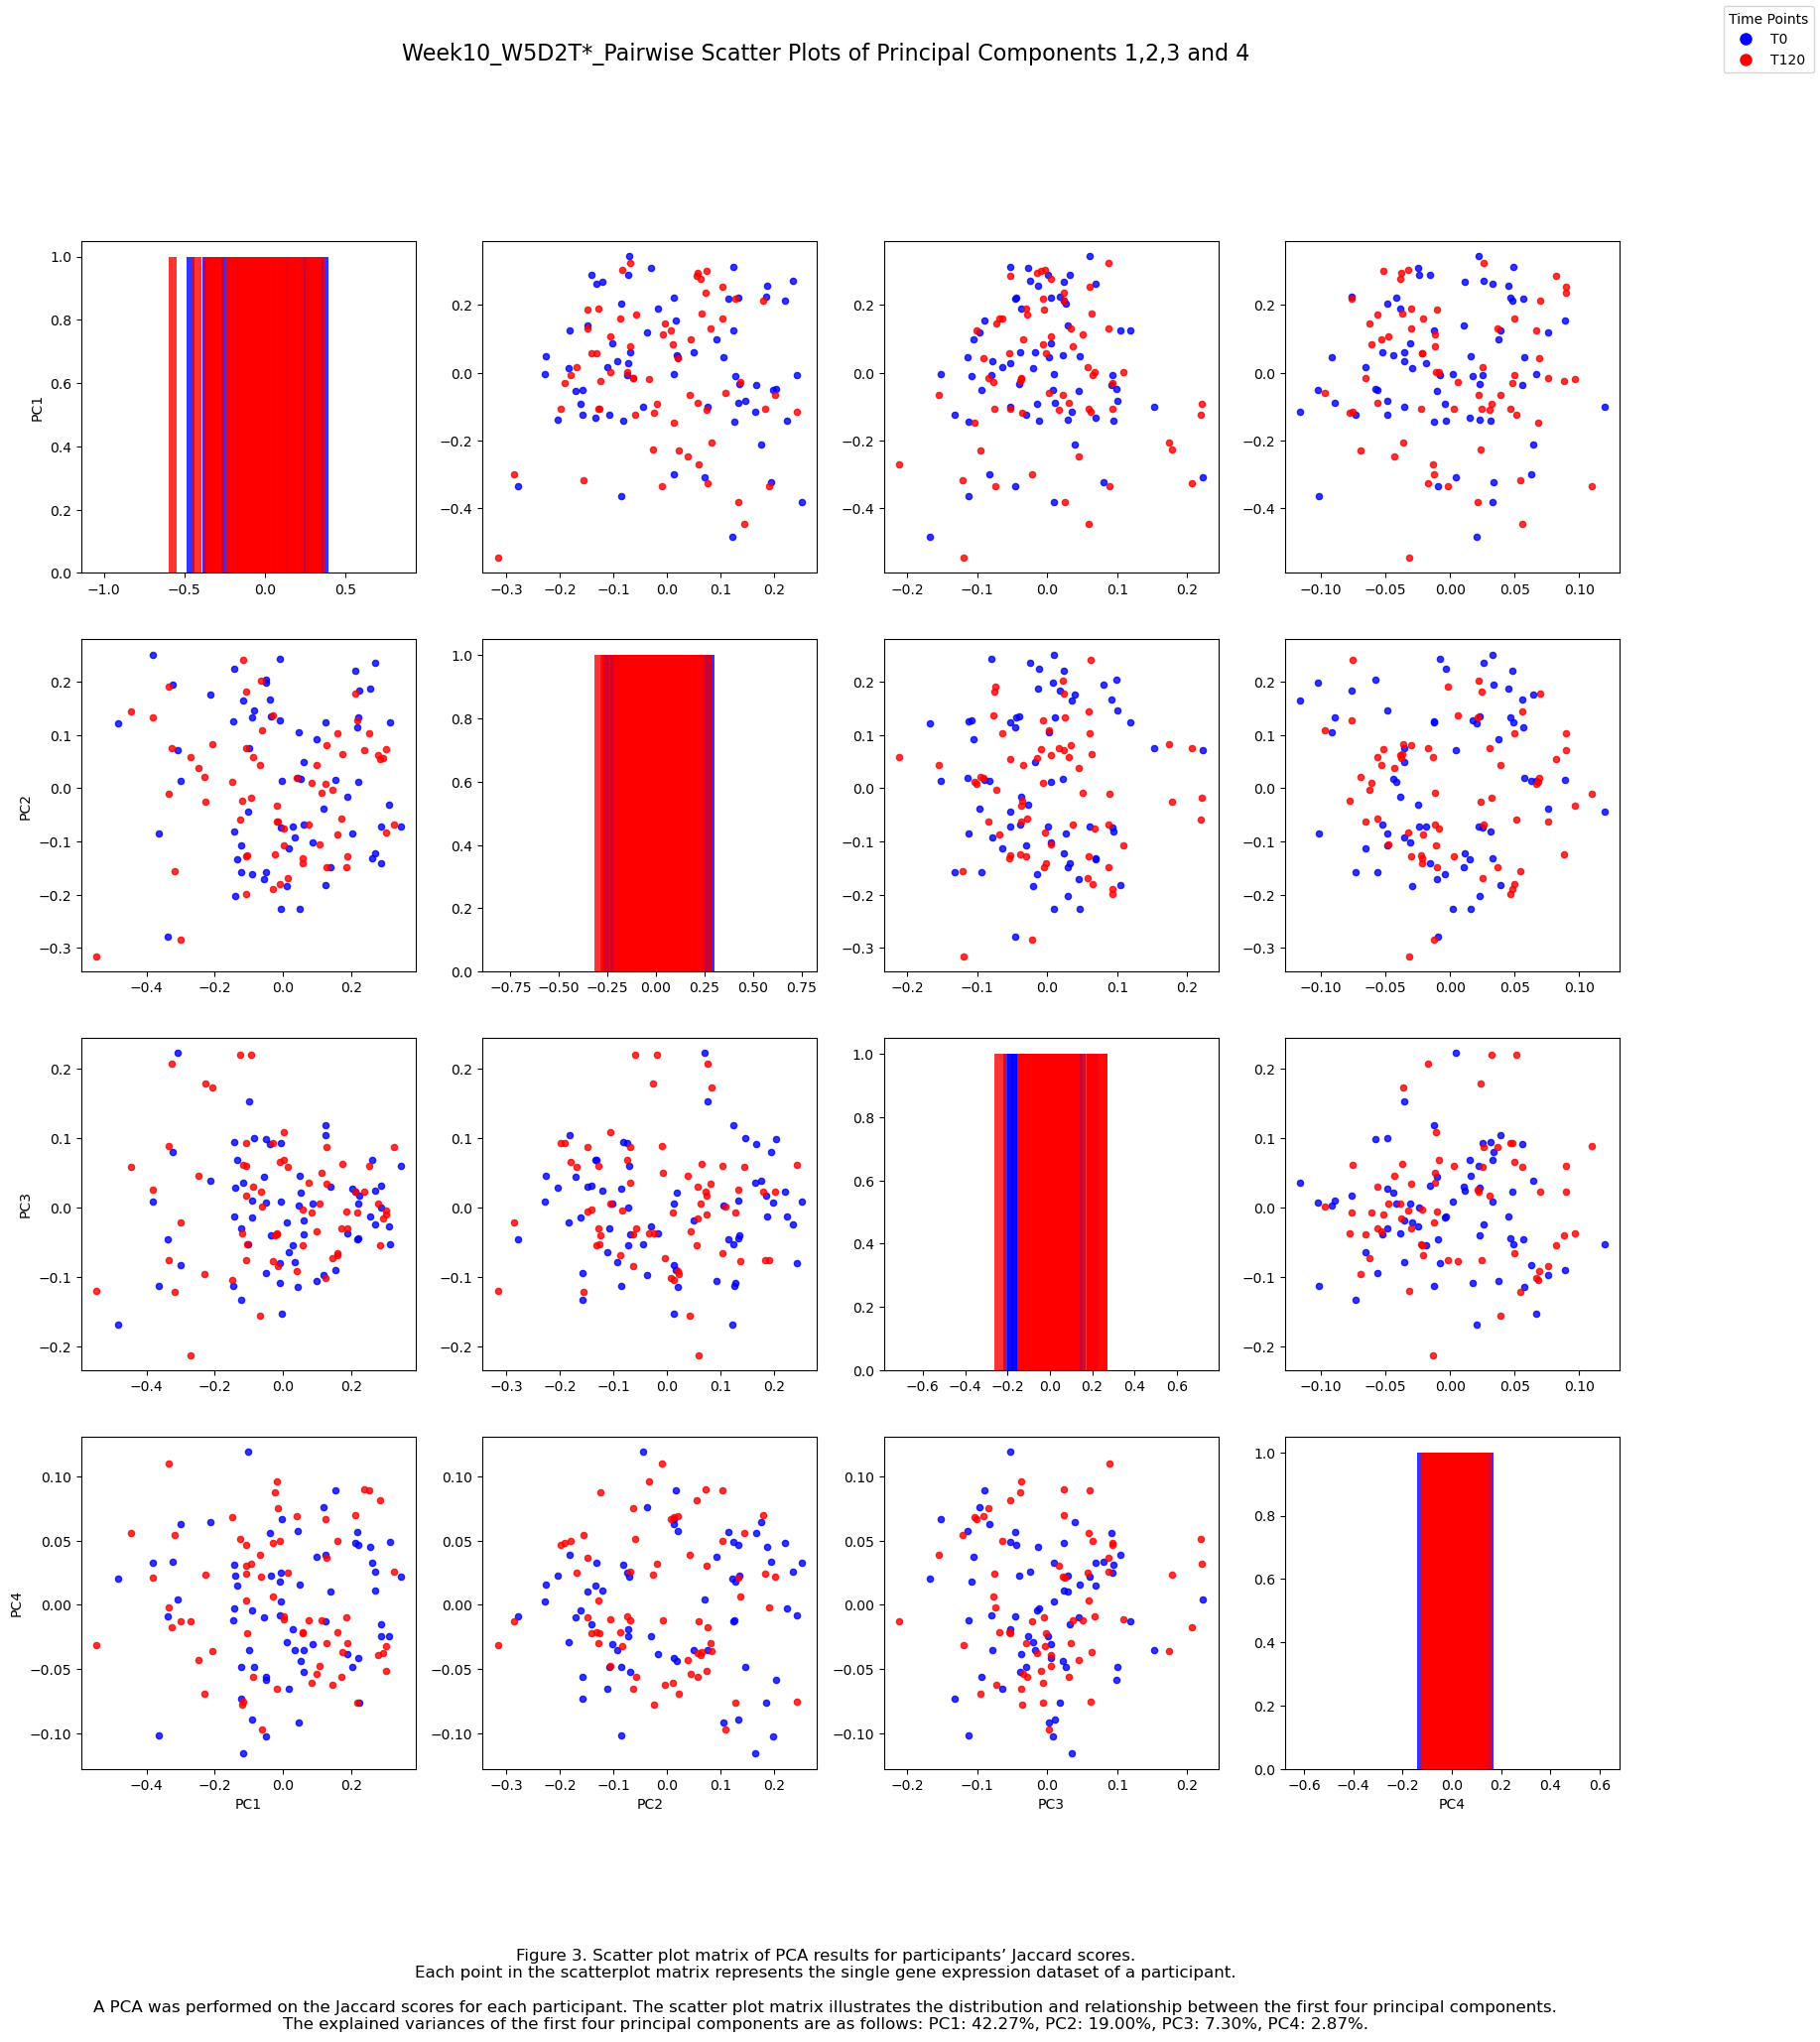

In [1]:
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat, loadmat

# Directories containing the .mat files
directory_path1 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T0'
directory_path2 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/cobra /W5D2T120'

# Load all models from directory 1 (T0)
models_T0 = []
labels_T0 = []
for filename in sorted(os.listdir(directory_path1)):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path1, filename)
        model = load_matlab_model(file_path)
        models_T0.append(model)
        labels_T0.append('T0')

# Load all models from directory 2 (T120)
models_T120 = []
labels_T120 = []
for filename in sorted(os.listdir(directory_path2)):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path2, filename)
        model = load_matlab_model(file_path)
        models_T120.append(model)
        labels_T120.append('T120')

# Combine models and labels
context_specific_models = models_T0 + models_T120
labels = labels_T0 + labels_T120

print(f"Loaded {len(models_T0)} models from T0.")
print(f"Loaded {len(models_T120)} models from T120.")
print(f"Total models loaded: {len(context_specific_models)}")

# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D2T*_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    Week10_W5D2T*_JaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'Week10_W5D2T*_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T*_JaccardScore.mat')['JaccardScore']

# Define labels
labels_num = [str(i) for i in range(1, len(jaccardScore) + 1)]

# Color coding based on time points
colors = ['blue' if label == 'T0' else 'red' for label in labels]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, len(jaccardScore) + 1), xticks=np.arange(1, len(jaccardScore) + 1))
g.ax_heatmap.set_xticklabels(labels_num, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels_num, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
annotations = []
for i in range(len(labels_num)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    plt.scatter(xs, ys, s=20, marker='o', color=colors[i], alpha=0.8)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='T0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='T120')]
plt.legend(handles=handles, title="Time Points")

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels_num)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color=colors[i], alpha=0.8)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='T0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='T120')]
ax.legend(handles=handles, title="Time Points")

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4

# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D2T*_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

# Color coding based on time points
colors = ['blue' if label == 'T0' else 'red' for label in labels]

for i in range(4):
    for j in range(4):
        if i == j:
            for k, c in zip(components[i], colors):
                axs[i, j].hist(k, bins=20, color=c, alpha=0.8)
        else:
            for x, y, c in zip(components[j], components[i], colors):
                axs[i, j].scatter(x, y, color=c, s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='T0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='T120')]
fig.legend(handles=handles, title="Time Points", loc='upper right')

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()



# W5D3 Code for comparison

## Check for unpaired files

In [11]:
import os

# Directories containing the .mat files
directory_path1 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T0'
directory_path2 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T120'
directory_path3 = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T240'

# Function to extract identifiers from filenames
def extract_identifiers(directory_path):
    identifiers = set()
    filenames = os.listdir(directory_path)
    for filename in filenames:
        if filename.endswith(".mat"):
            identifier = filename.split('_')[0]  # Assuming identifier is the first part before the first underscore
            identifiers.add(identifier)
    return identifiers, filenames

# Extract identifiers and filenames from all three directories
identifiers1, filenames1 = extract_identifiers(directory_path1)
identifiers2, filenames2 = extract_identifiers(directory_path2)
identifiers3, filenames3 = extract_identifiers(directory_path3)

# Find unpaired files
unpaired_in_dir1 = [filename for filename in filenames1 if filename.split('_')[0] not in identifiers2 or filename.split('_')[0] not in identifiers3]
unpaired_in_dir2 = [filename for filename in filenames2 if filename.split('_')[0] not in identifiers1 or filename.split('_')[0] not in identifiers3]
unpaired_in_dir3 = [filename for filename in filenames3 if filename.split('_')[0] not in identifiers1 or filename.split('_')[0] not in identifiers2]

print(f"Unpaired files in {directory_path1}:")
for filename in unpaired_in_dir1:
    print(filename)

print(f"\nUnpaired files in {directory_path2}:")
for filename in unpaired_in_dir2:
    print(filename)

print(f"\nUnpaired files in {directory_path3}:")
for filename in unpaired_in_dir3:
    print(filename)


Unpaired files in /Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T0:
.DS_Store

Unpaired files in /Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T120:
.DS_Store

Unpaired files in /Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T240:
.DS_Store


## 1.W5D3T0 Jaccard distance heatmaps and PCA plots
adjust the below code for W5D3T0, change indices

No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 56 models.
Jaccard distance matrix calculated.
[[1.         0.84344767 0.84581498 ... 0.8313201  0.81302521 0.82835184]
 [0.84344767 1.         0.84434389 ... 0.85662921 0.81390328 0.84424779]
 [0.84581498 0.84434389 1.         ... 0.84660107 0.84571429 0.84336283]
 ...
 [0.8313201  0.85662921 0.84660107 ... 1.         0.82106164 0.82885615]
 [0.81302521 0.81390328 0.84571429 ... 0.82106164 1.         0.80067142]
 [0.82835184 0.84424779 0.84336283 ... 0.82885615 0.80067142 1.        ]]
Jaccard scores saved to Week10_W5D3T0_JaccardScore.mat.
[0.50651884 0.10026479 0.05736764]


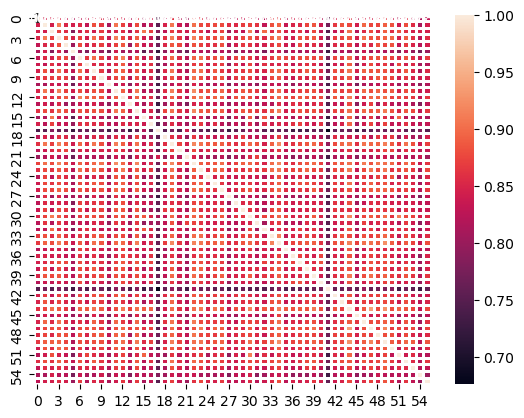

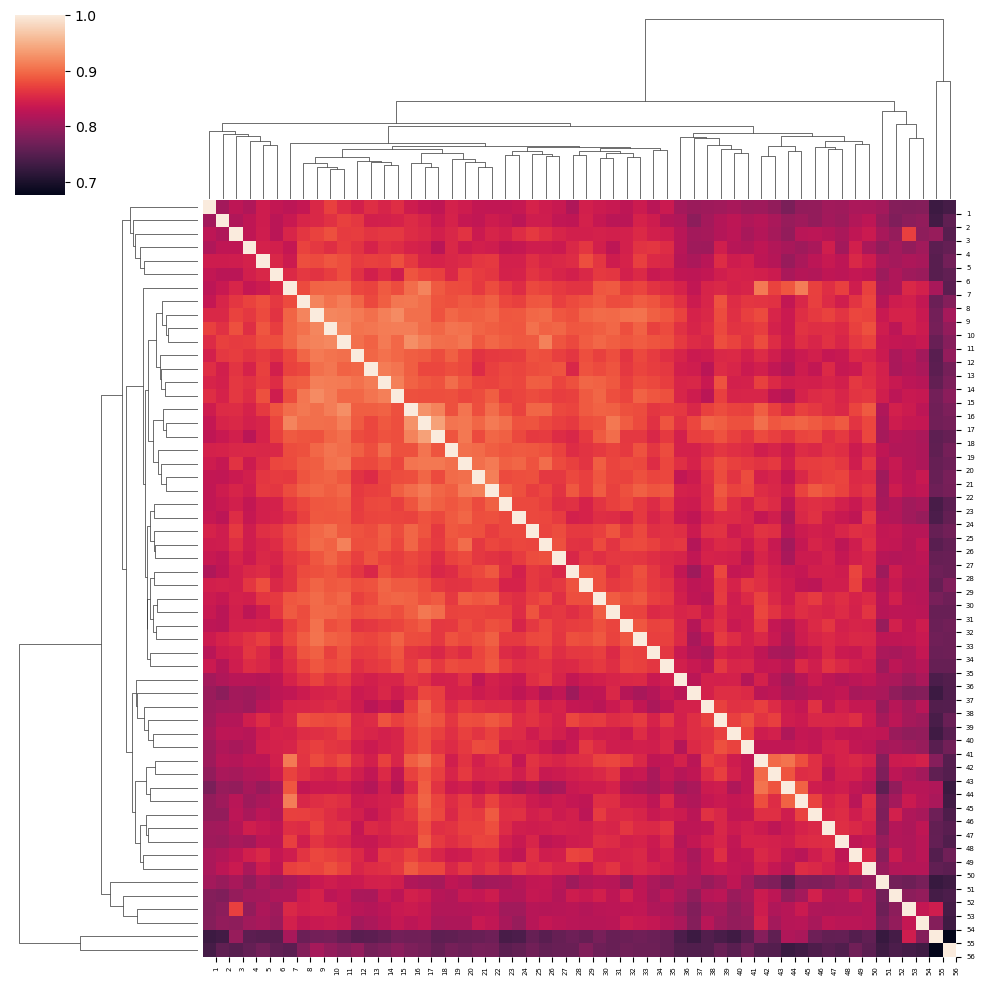

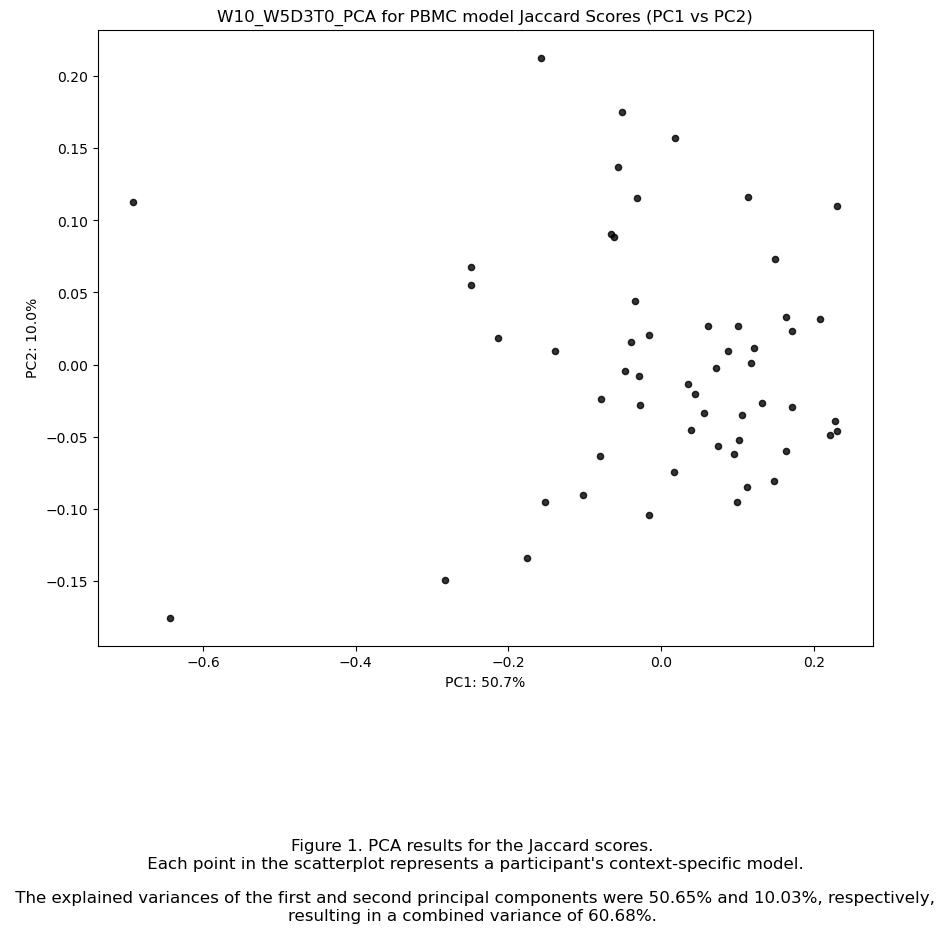

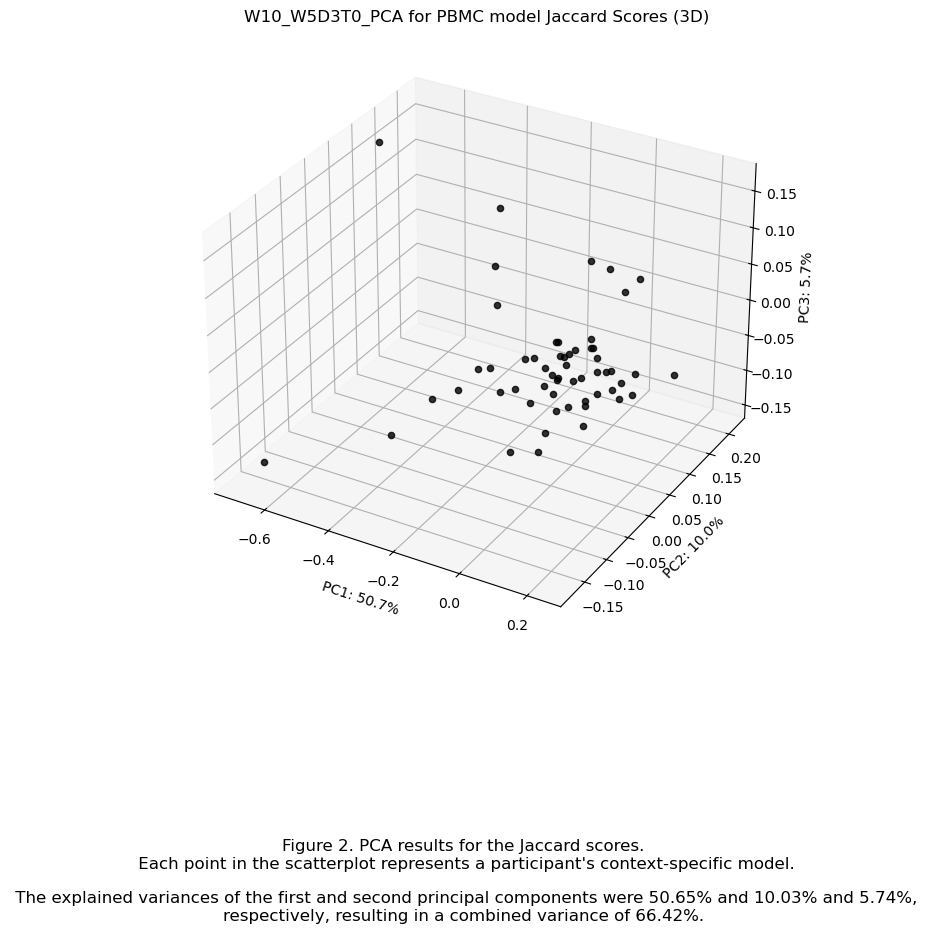

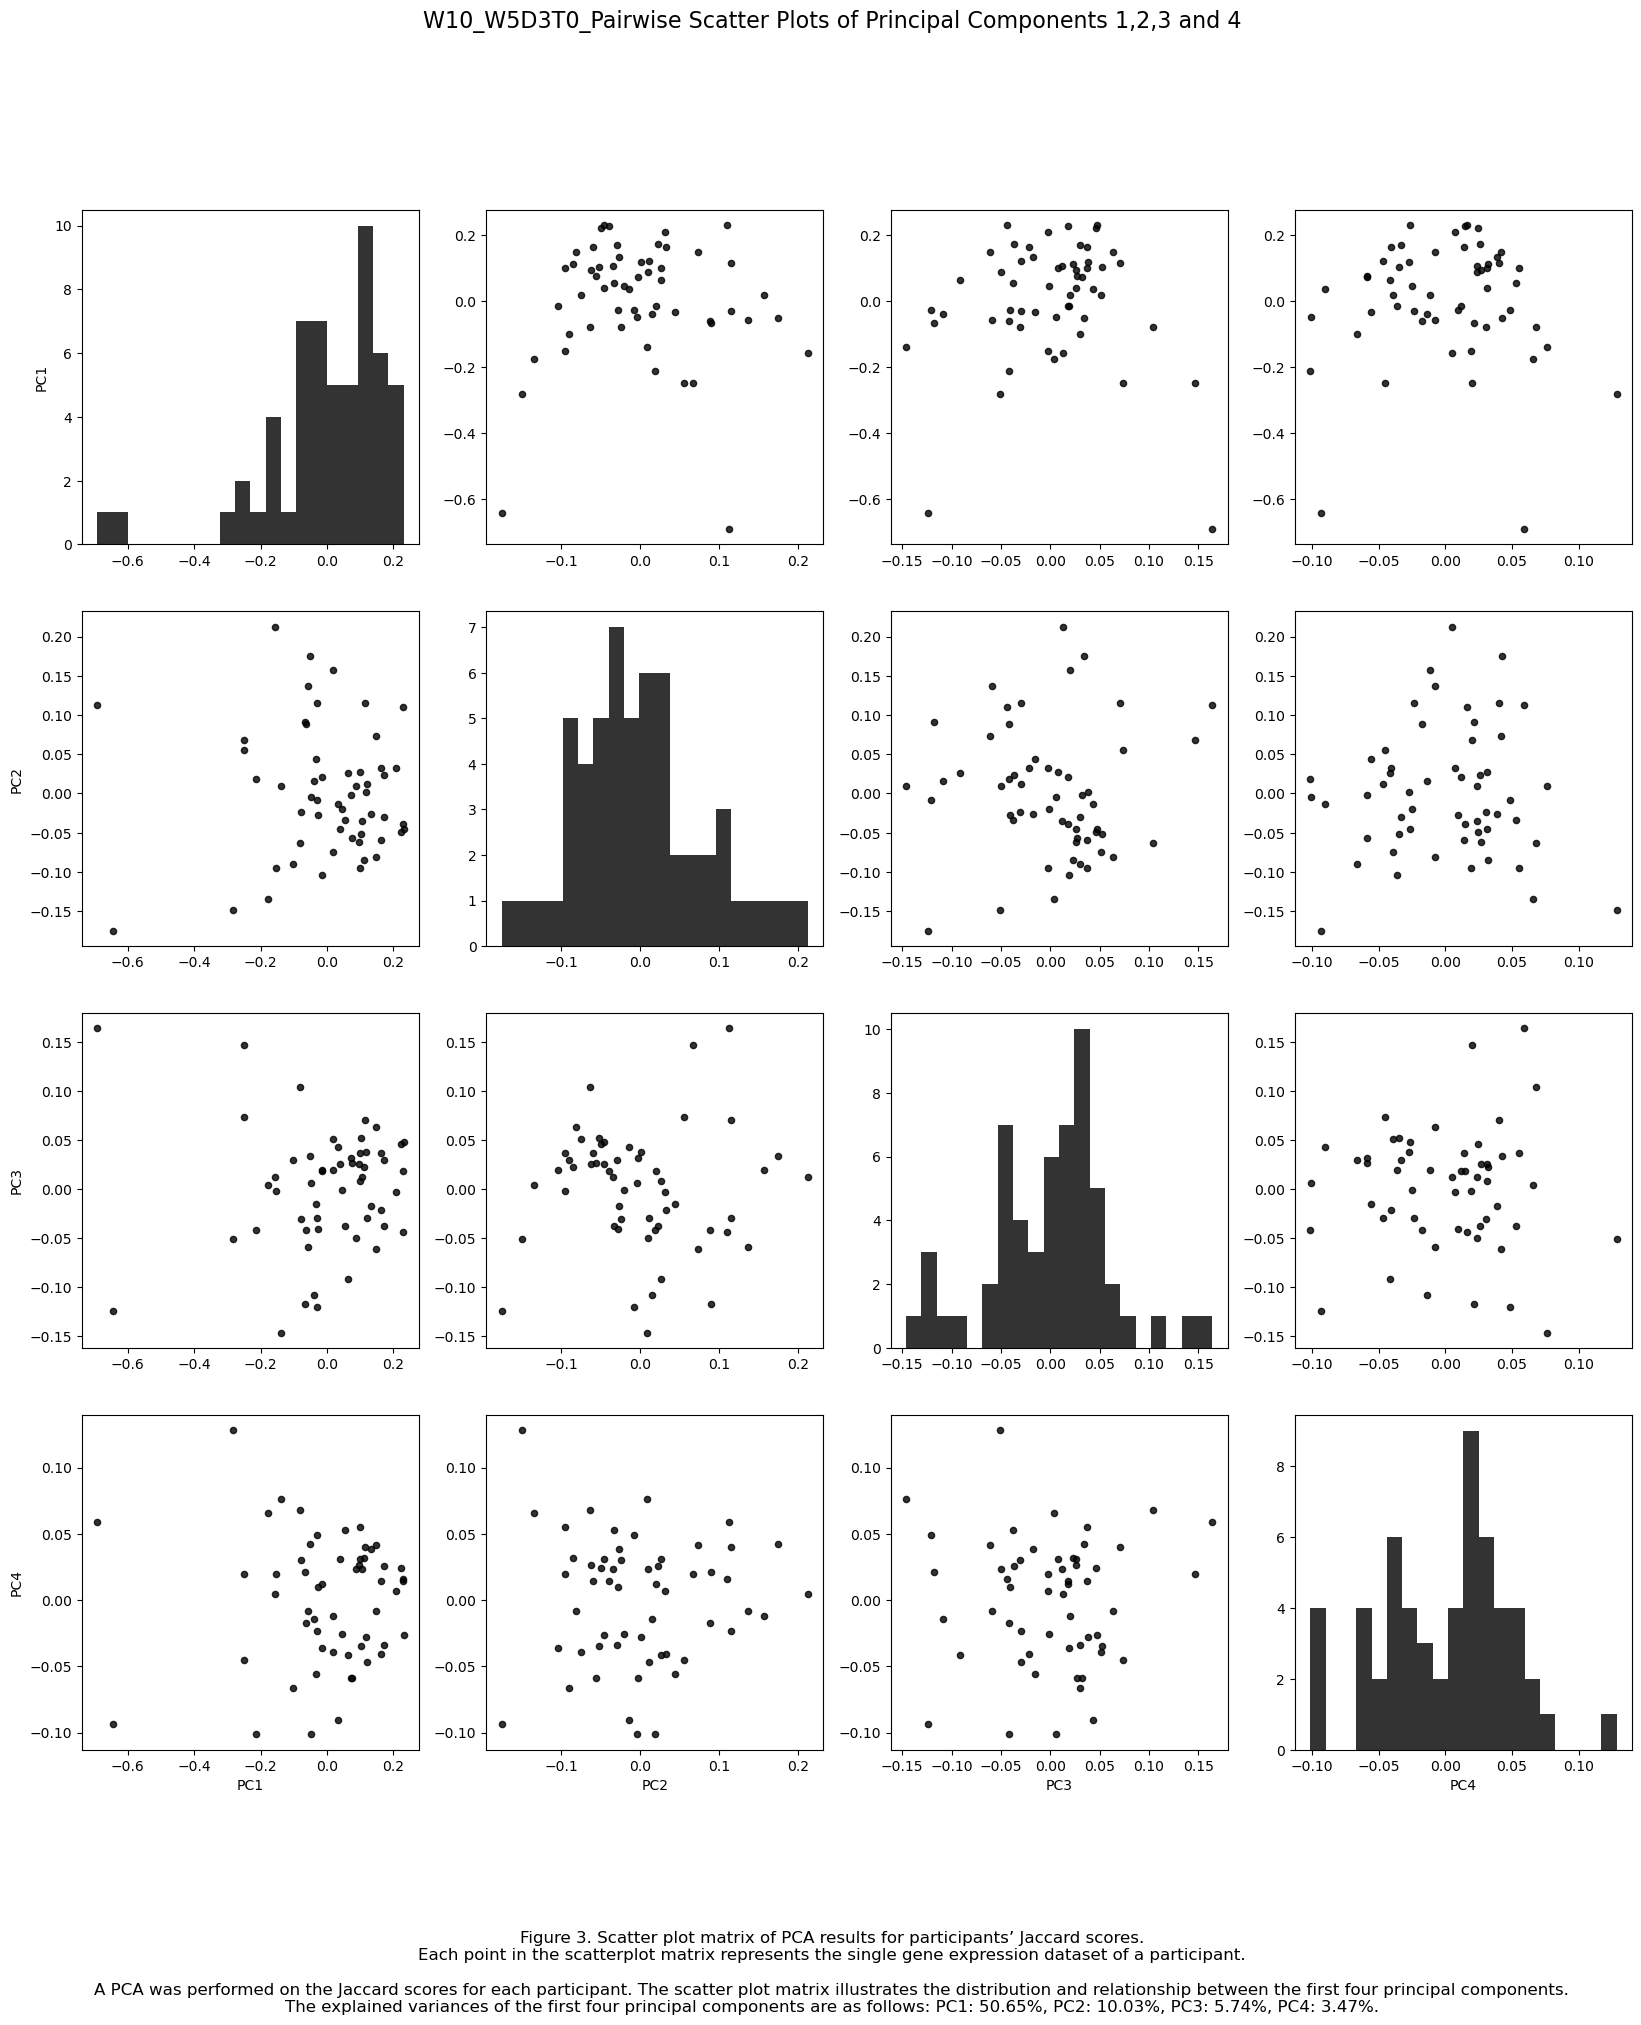

In [1]:
# Load all models 
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat

# Directory containing the .mat files
directory_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T0'

# Load all models from the directory
context_specific_models = []
for filename in os.listdir(directory_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path, filename)
        model = load_matlab_model(file_path)
        context_specific_models.append(model)

print(f"Loaded {len(context_specific_models)} models.")


########################### Calculate jaccard distance 
# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D3T0_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")


########################### Heat maps and plots 

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    monocyteJaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'W10_W5D3T0_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T0_JaccardScore.mat')['JaccardScore']

# Define labels
labels = [str(i) for i in range(1, 57)]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, 57), xticks=np.arange(1, 57))
g.ax_heatmap.set_xticklabels(labels, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 8))
annotations = []
for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    clu = plt.scatter(xs, ys, s=20, marker='o', color='black', alpha=0.8)

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color='black', alpha=0.8)

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4


# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T0_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_


fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(components[i], bins=20, color='black', alpha=0.8)
        else:
            axs[i, j].scatter(components[j], components[i], color='black', s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()


## 2.W5D3T120 Jaccard distance heatmaps and PCA plots

No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 56 models.
Jaccard distance matrix calculated.
[[1.         0.81164384 0.87111111 ... 0.83026935 0.8532869  0.85614342]
 [0.81164384 1.         0.86266485 ... 0.85943775 0.86369771 0.86754069]
 [0.87111111 0.86266485 1.         ... 0.86543654 0.87830447 0.88745981]
 ...
 [0.83026935 0.85943775 0.86543654 ... 1.         0.86726058 0.87696453]
 [0.8532869  0.86369771 0.87830447 ... 0.86726058 1.         0.91344383]
 [0.85614342 0.86754069 0.88745981 ... 0.87696453 0.91344383 1.        ]]
Jaccard scores saved to Week10_W5D3T120_JaccardScore.mat.
[0.38857607 0.10719896 0.08933342]


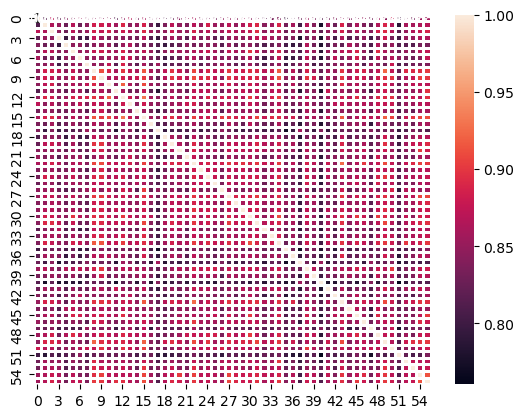

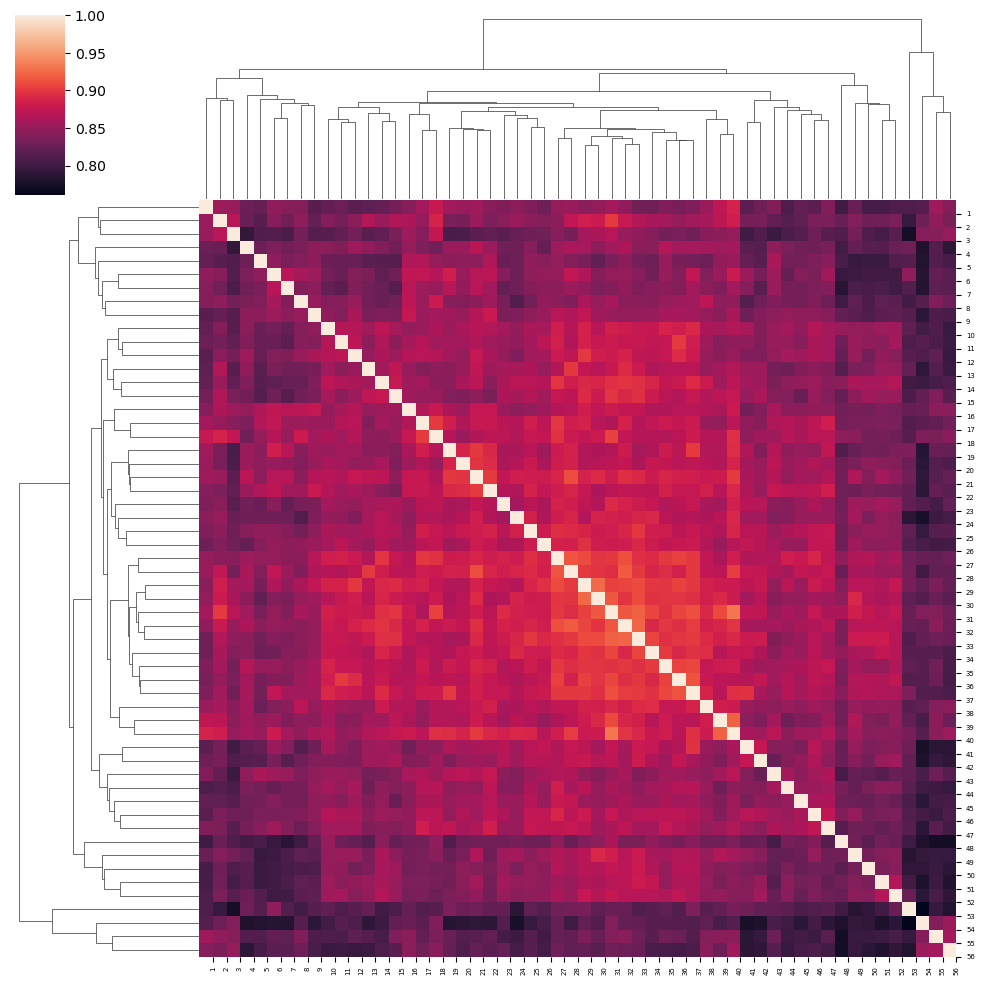

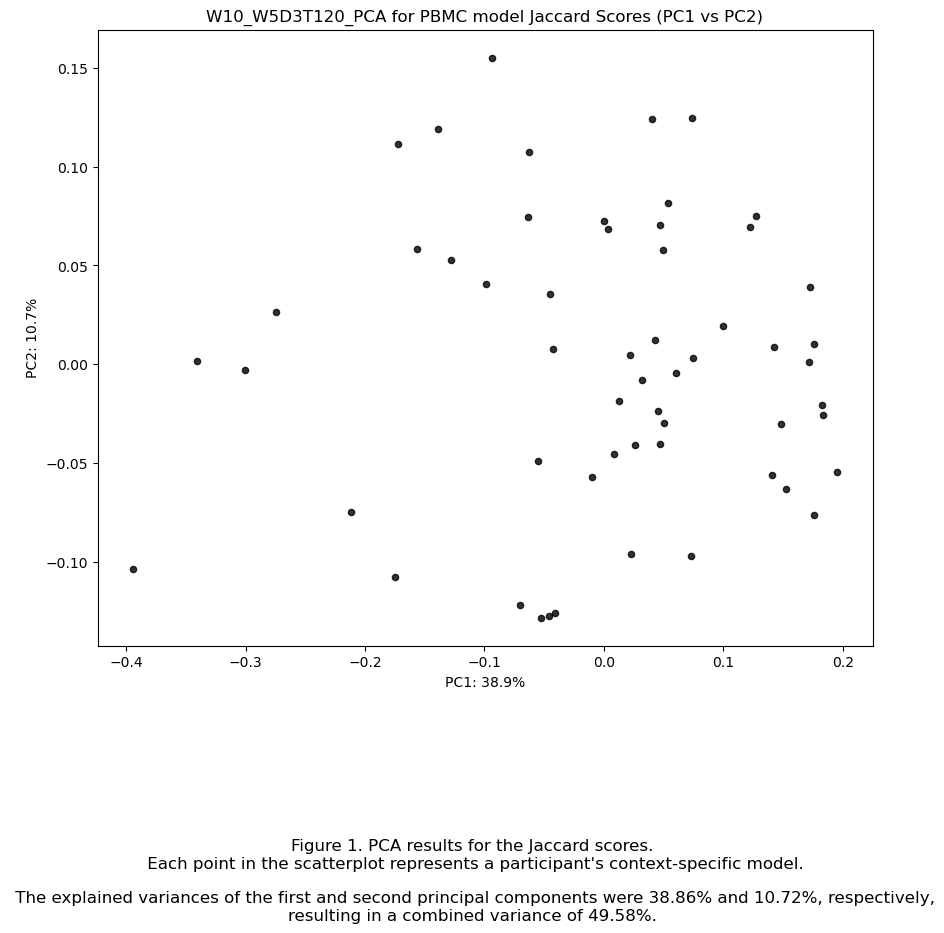

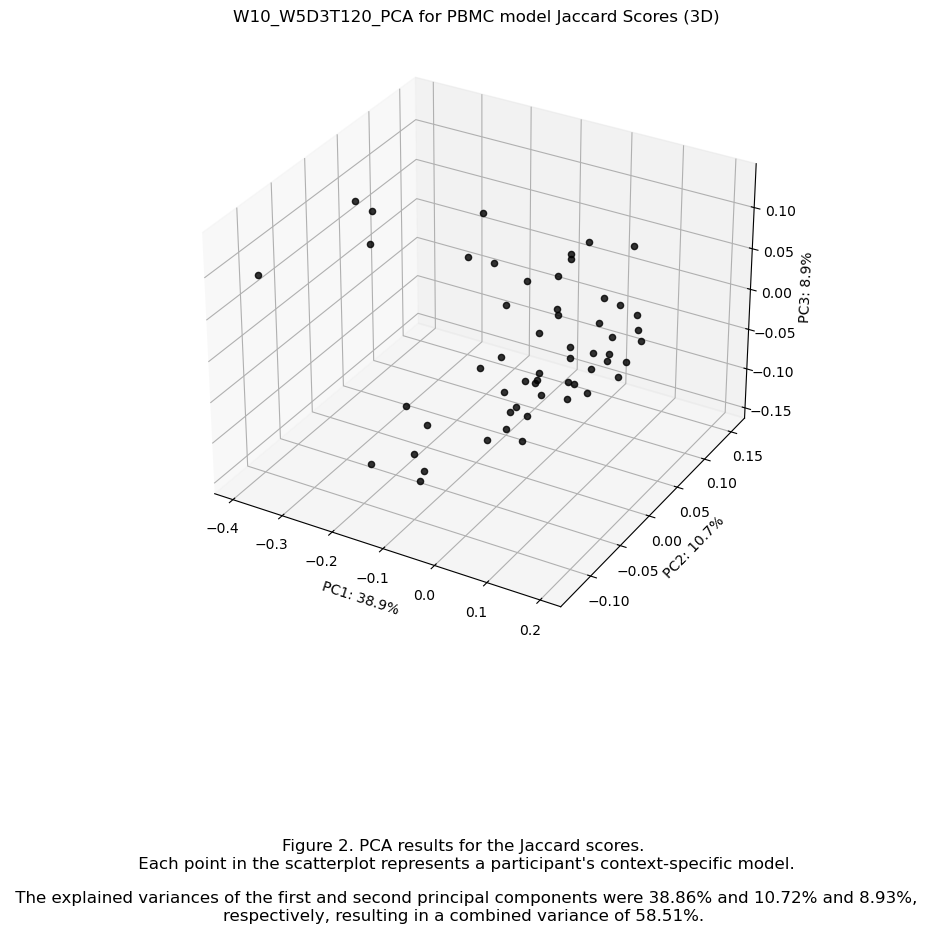

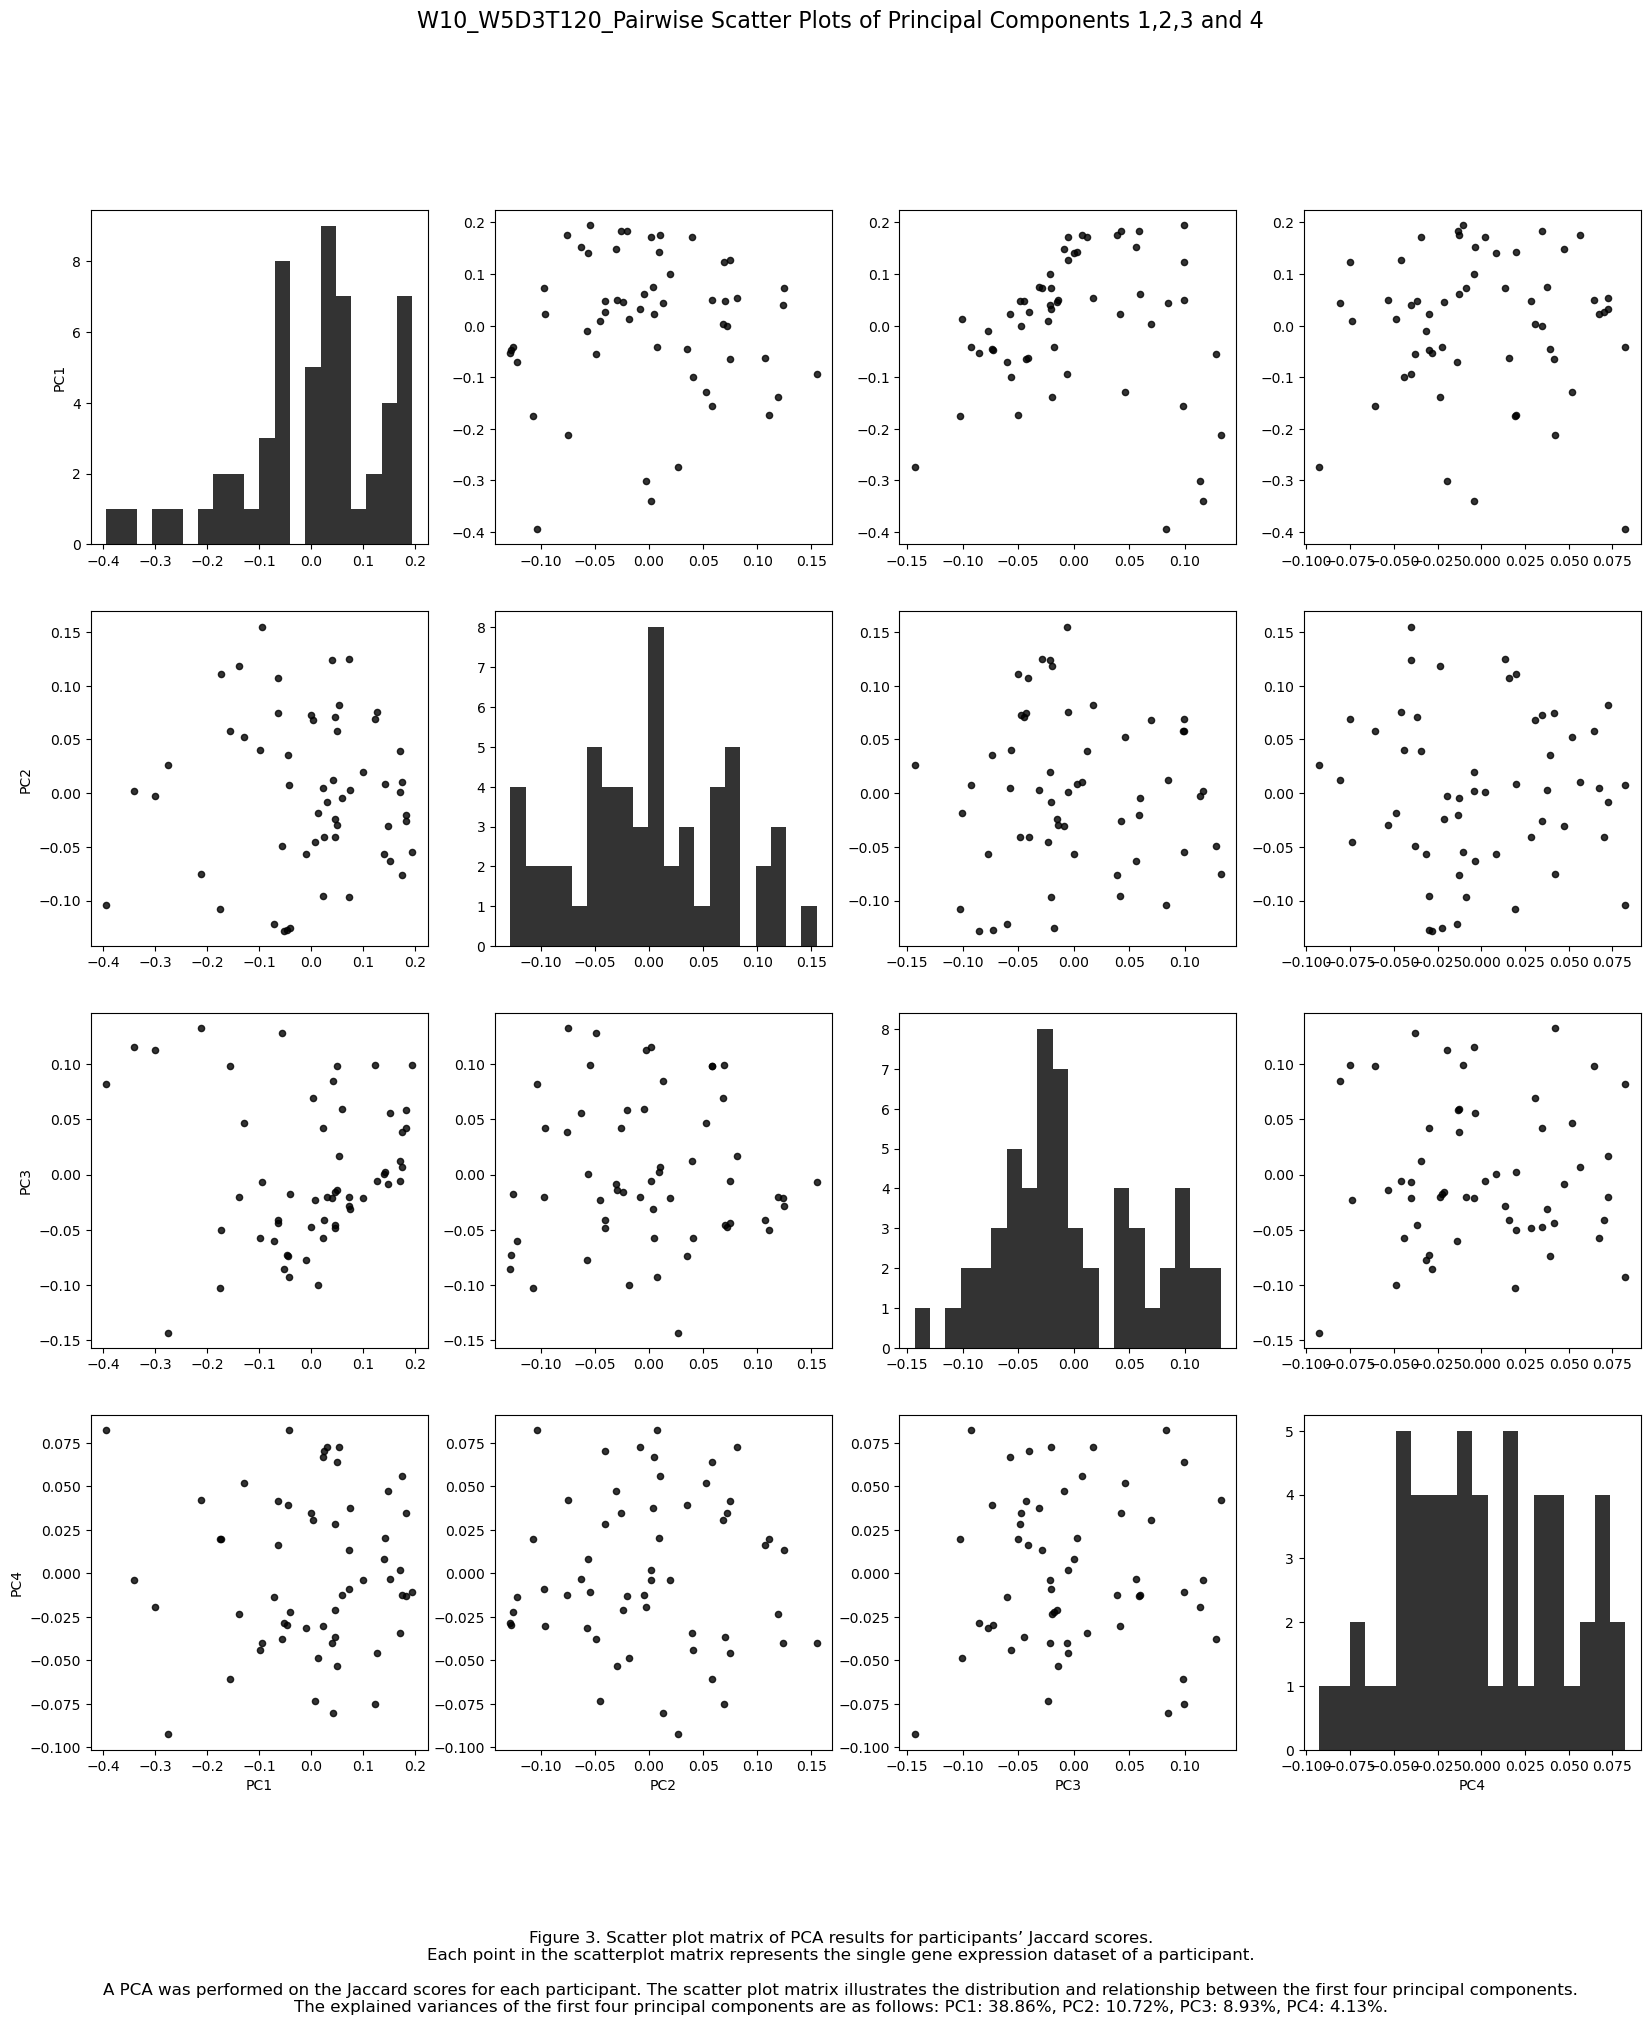

In [2]:
# Load all models 
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat

# Directory containing the .mat files
directory_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T120'

# Load all models from the directory
context_specific_models = []
for filename in os.listdir(directory_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path, filename)
        model = load_matlab_model(file_path)
        context_specific_models.append(model)

print(f"Loaded {len(context_specific_models)} models.")


########################### Calculate jaccard distance 
# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D3T120_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")


########################### Heat maps and plots 

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    monocyteJaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'W10_W5D3T120_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T120_JaccardScore.mat')['JaccardScore']

# Define labels
labels = [str(i) for i in range(1, 57)]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, 57), xticks=np.arange(1, 57))
g.ax_heatmap.set_xticklabels(labels, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 8))
annotations = []
for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    clu = plt.scatter(xs, ys, s=20, marker='o', color='black', alpha=0.8)

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color='black', alpha=0.8)

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4


# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T120_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_


fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(components[i], bins=20, color='black', alpha=0.8)
        else:
            axs[i, j].scatter(components[j], components[i], color='black', s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()


## 3.W5D3T240 Jaccard distance heatmaps and PCA plots

No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 56 models.
Jaccard distance matrix calculated.
[[1.         0.80559032 0.8566494  ... 0.81364606 0.85874246 0.83629277]
 [0.80559032 1.         0.85353095 ... 0.84591747 0.84362851 0.85568836]
 [0.8566494  0.85353095 1.         ... 0.84171076 0.87444739 0.8655914 ]
 ...
 [0.81364606 0.84591747 0.84171076 ... 1.         0.86853832 0.90073869]
 [0.85874246 0.84362851 0.87444739 ... 0.86853832 1.         0.87024609]
 [0.83629277 0.85568836 0.8655914  ... 0.90073869 0.87024609 1.        ]]
Jaccard scores saved to Week10_W5D3T240_JaccardScore.mat.
[0.32141164 0.15342598 0.06252003]


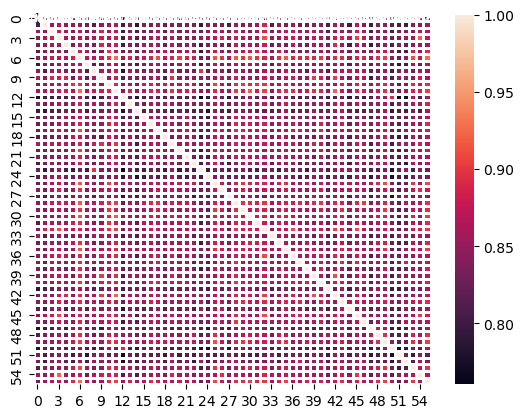

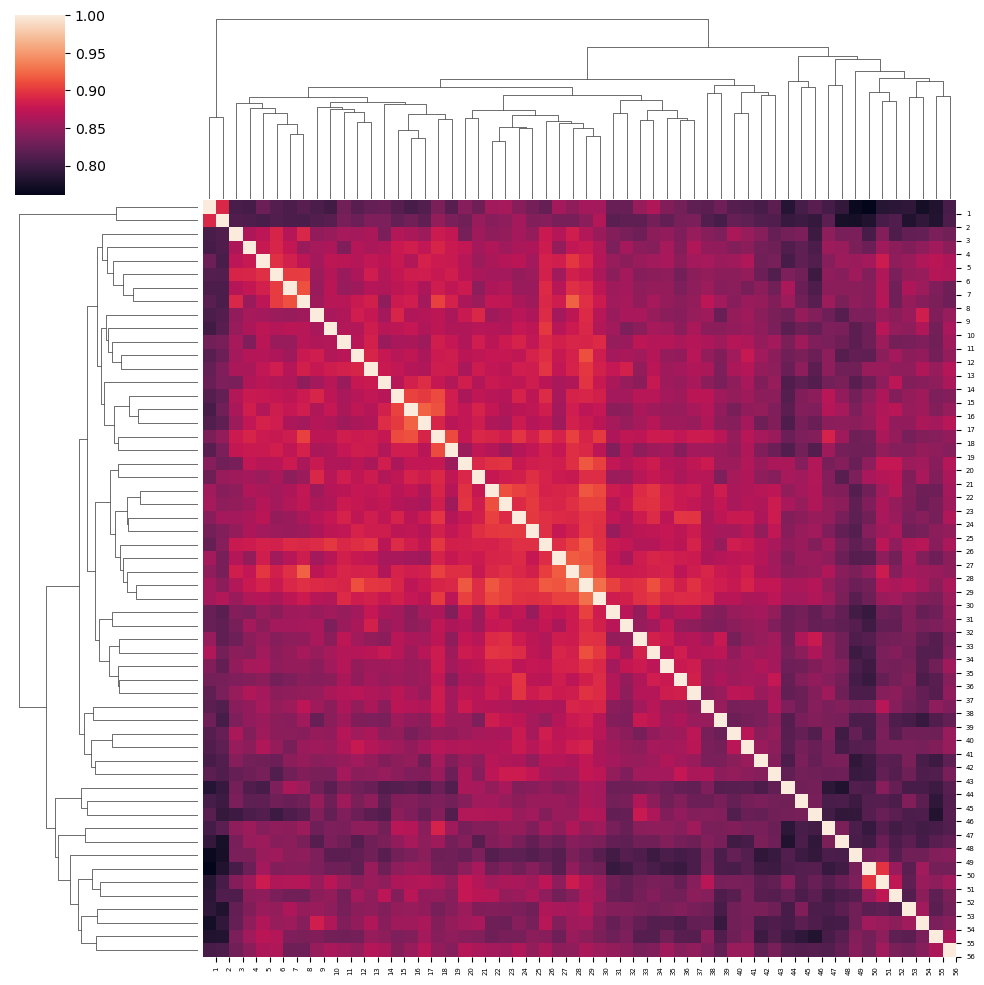

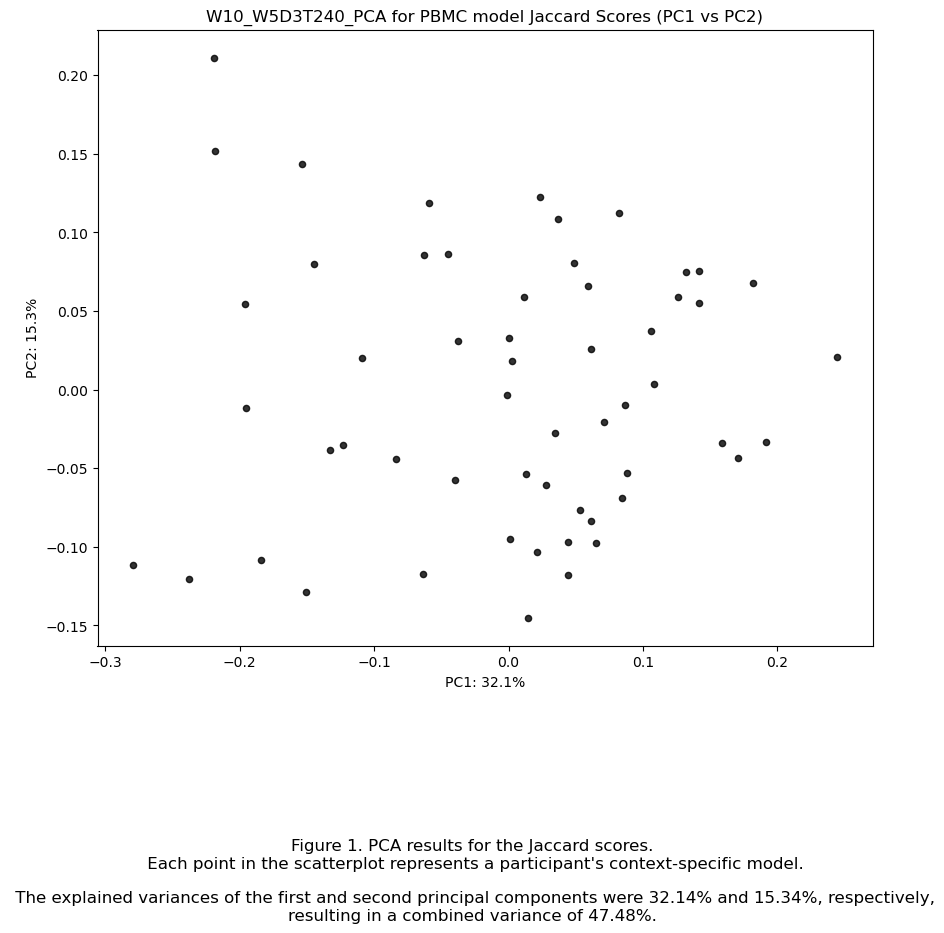

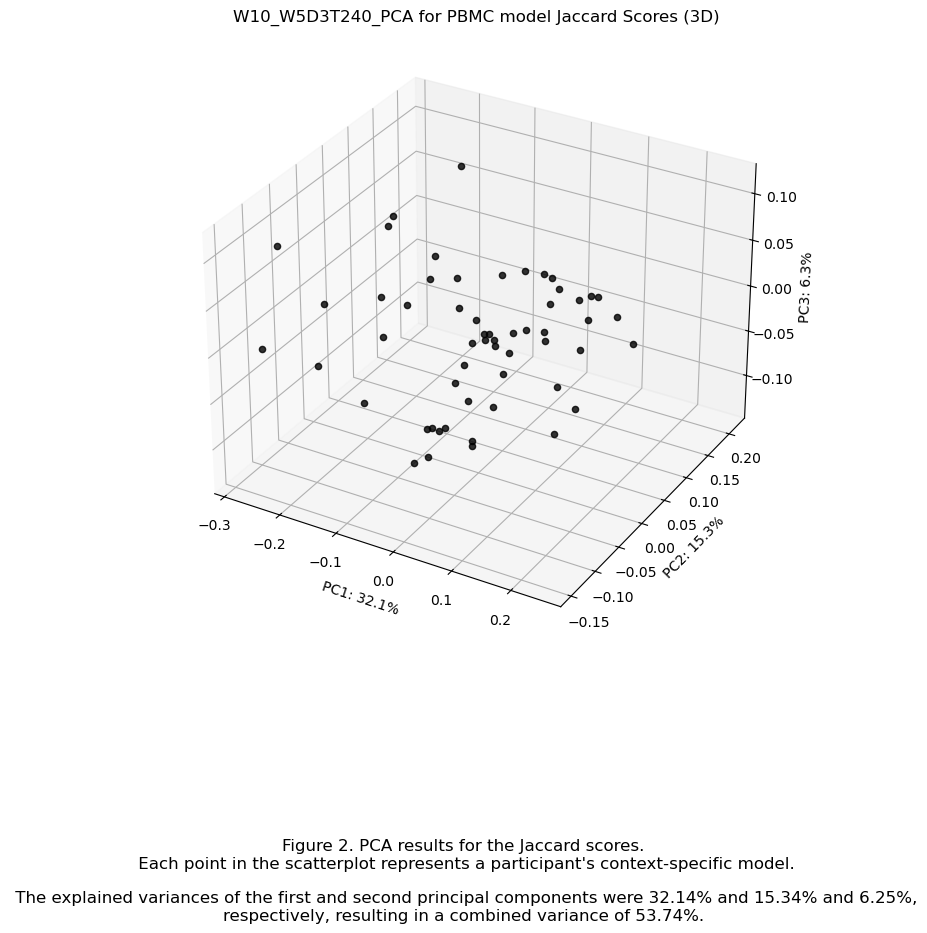

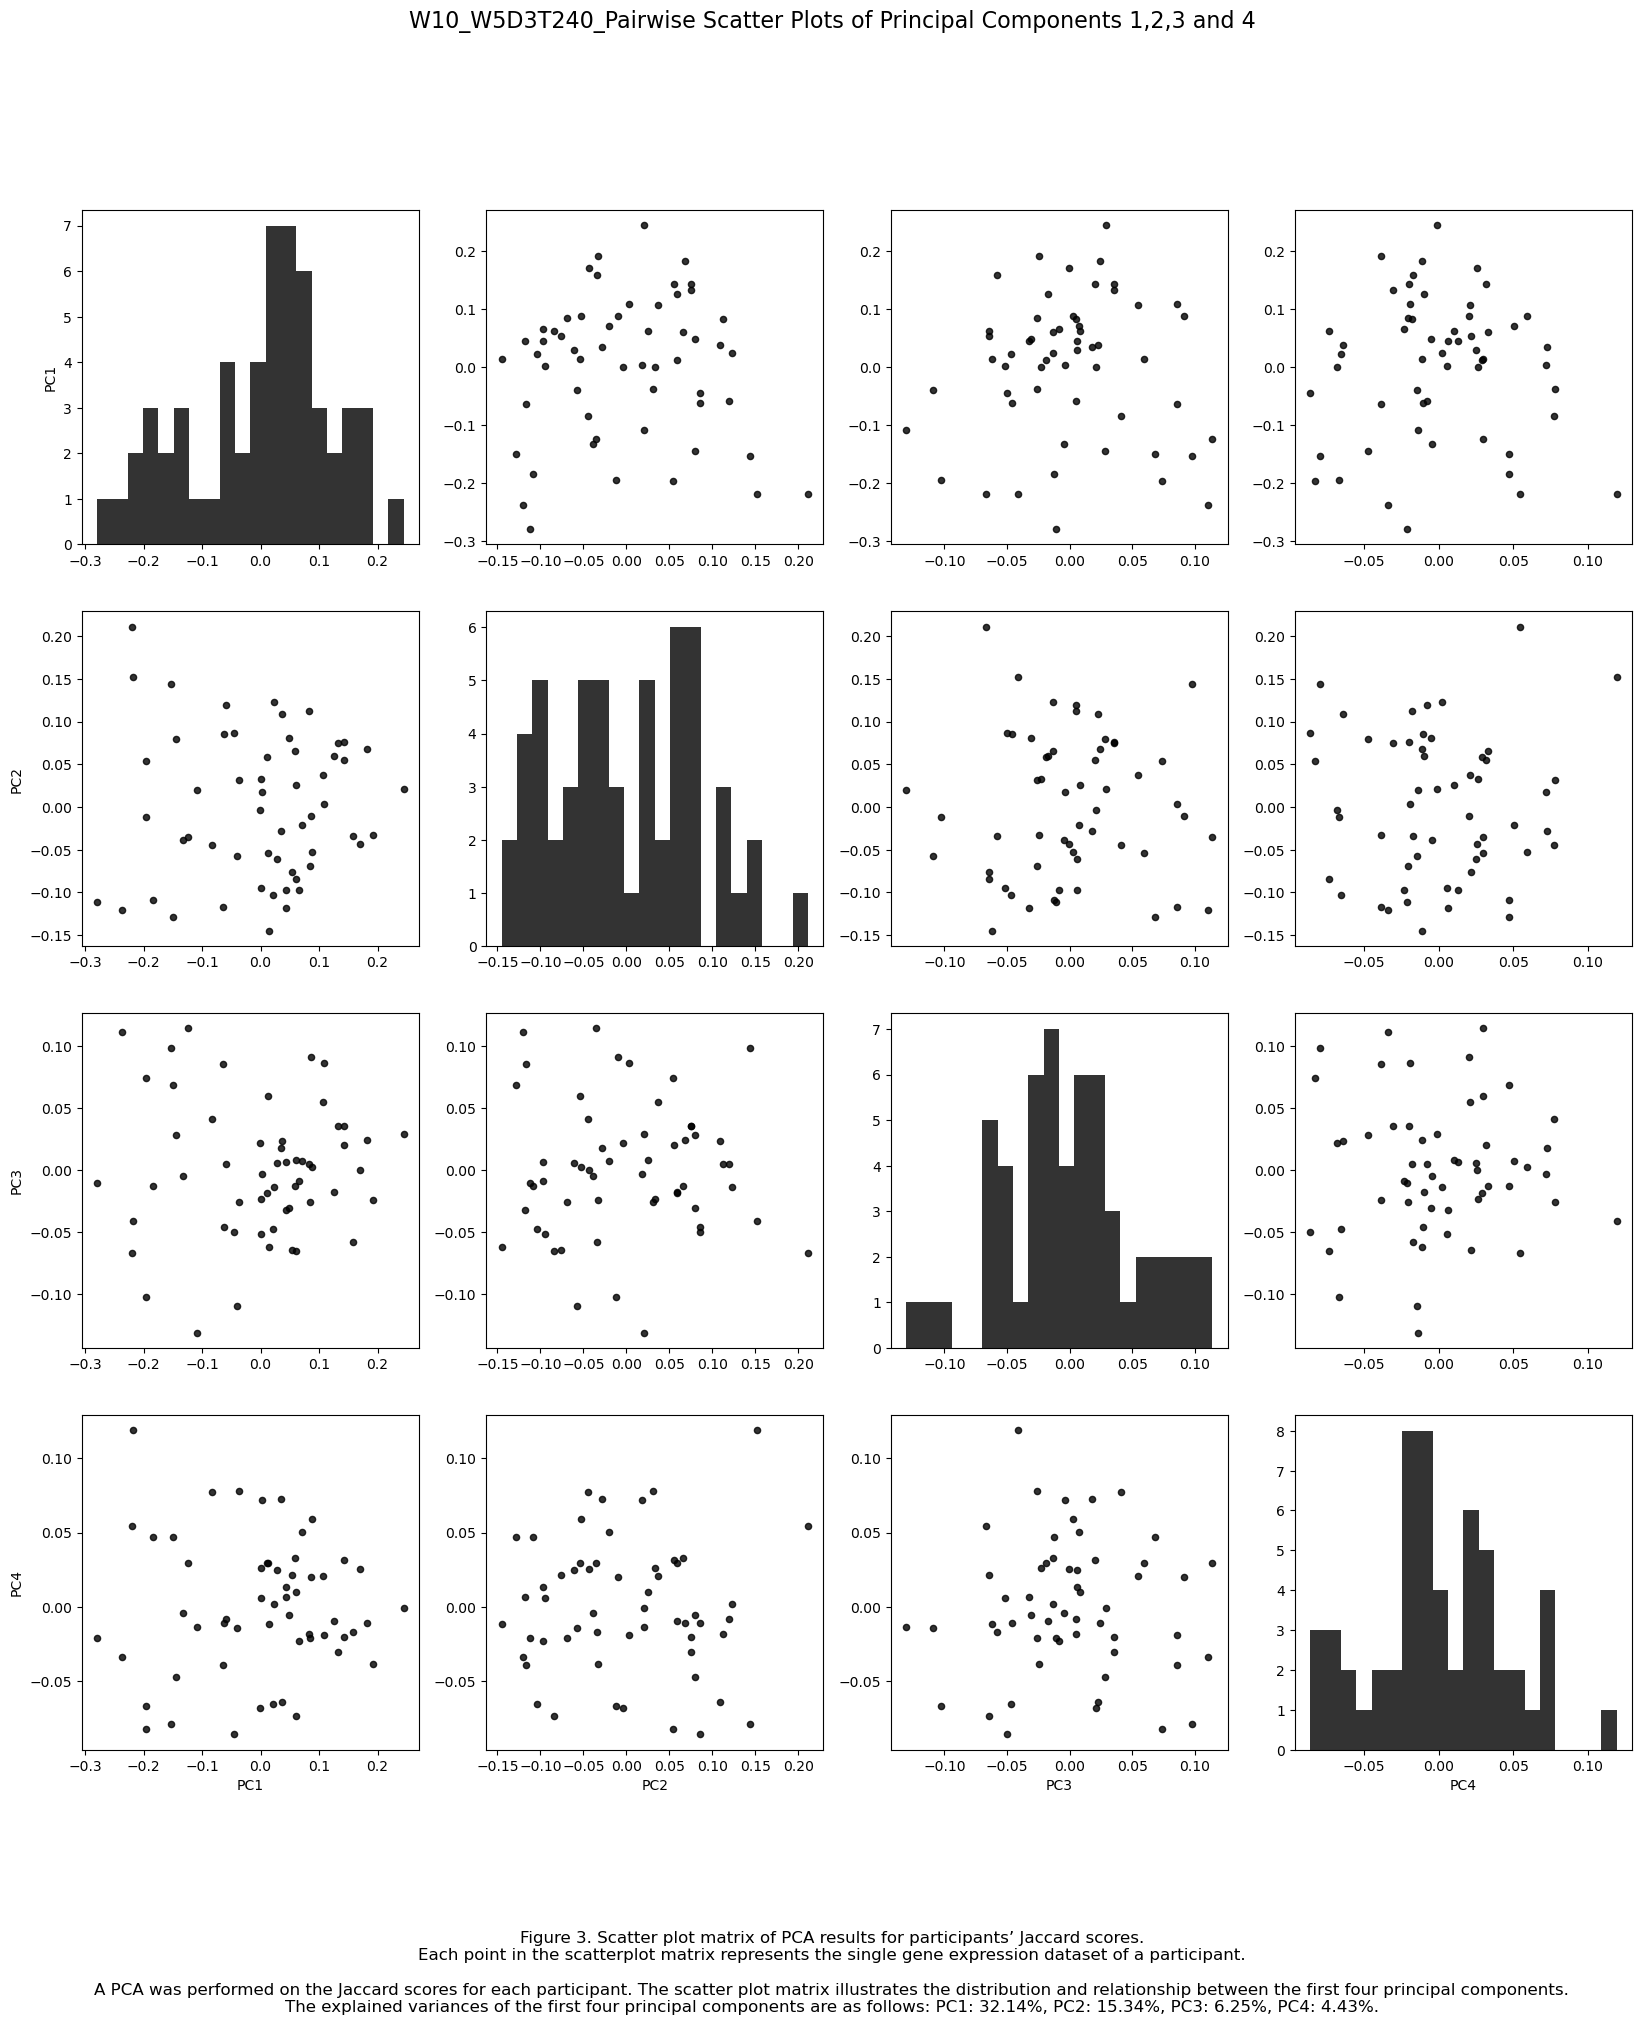

In [3]:
# Load all models 
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat

# Directory containing the .mat files
directory_path = '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T240'

# Load all models from the directory
context_specific_models = []
for filename in os.listdir(directory_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(directory_path, filename)
        model = load_matlab_model(file_path)
        context_specific_models.append(model)

print(f"Loaded {len(context_specific_models)} models.")


########################### Calculate jaccard distance 
# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D3T240_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")


########################### Heat maps and plots 

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    monocyteJaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'W10_W5D3T240_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T240_JaccardScore.mat')['JaccardScore']

# Define labels
labels = [str(i) for i in range(1, 57)]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, 57), xticks=np.arange(1, 57))
g.ax_heatmap.set_xticklabels(labels, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 8))
annotations = []
for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    clu = plt.scatter(xs, ys, s=20, marker='o', color='black', alpha=0.8)

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color='black', alpha=0.8)

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4


# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T240_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_


fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(components[i], bins=20, color='black', alpha=0.8)
        else:
            axs[i, j].scatter(components[j], components[i], color='black', s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()


## 4. W5D3T0 * W5D3T120 * W5D3T240

### W5D3T0 vs W5D3T120

### W5D3T0 vs W5D3T240

### W5D3T120 vs W5D3T240

## 5. W5D3T* (all models together in 1 folder)

No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in mod

Loaded 168 models.
Jaccard distance matrix calculated.
[[1.         0.86571173 0.82686567 ... 0.8190678  0.79552435 0.8419904 ]
 [0.86571173 1.         0.85752688 ... 0.84830961 0.83821478 0.89419954]
 [0.82686567 0.85752688 1.         ... 0.83619948 0.79690949 0.84365393]
 ...
 [0.8190678  0.84830961 0.83619948 ... 1.         0.804069   0.8371179 ]
 [0.79552435 0.83821478 0.79690949 ... 0.804069   1.         0.80206928]
 [0.8419904  0.89419954 0.84365393 ... 0.8371179  0.80206928 1.        ]]
Jaccard scores saved to Week10_W5D3T*_JaccardScore.mat.


/Users/douglas/anaconda3/envs/cobra_venv/lib/python3.11/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/douglas/anaconda3/envs/cobra_venv/lib/python3.11/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


[0.55264563 0.11614215 0.0574129 ]


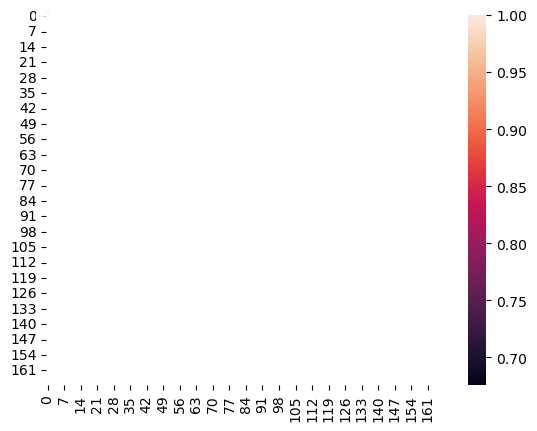

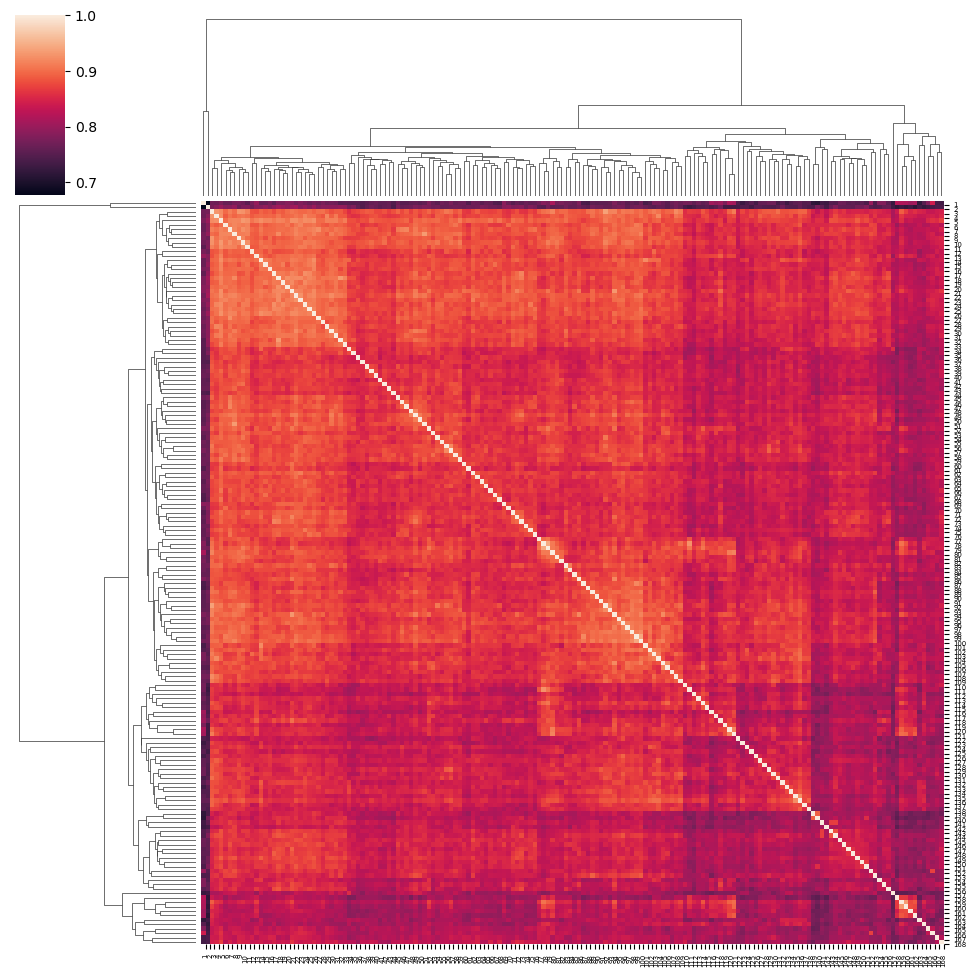

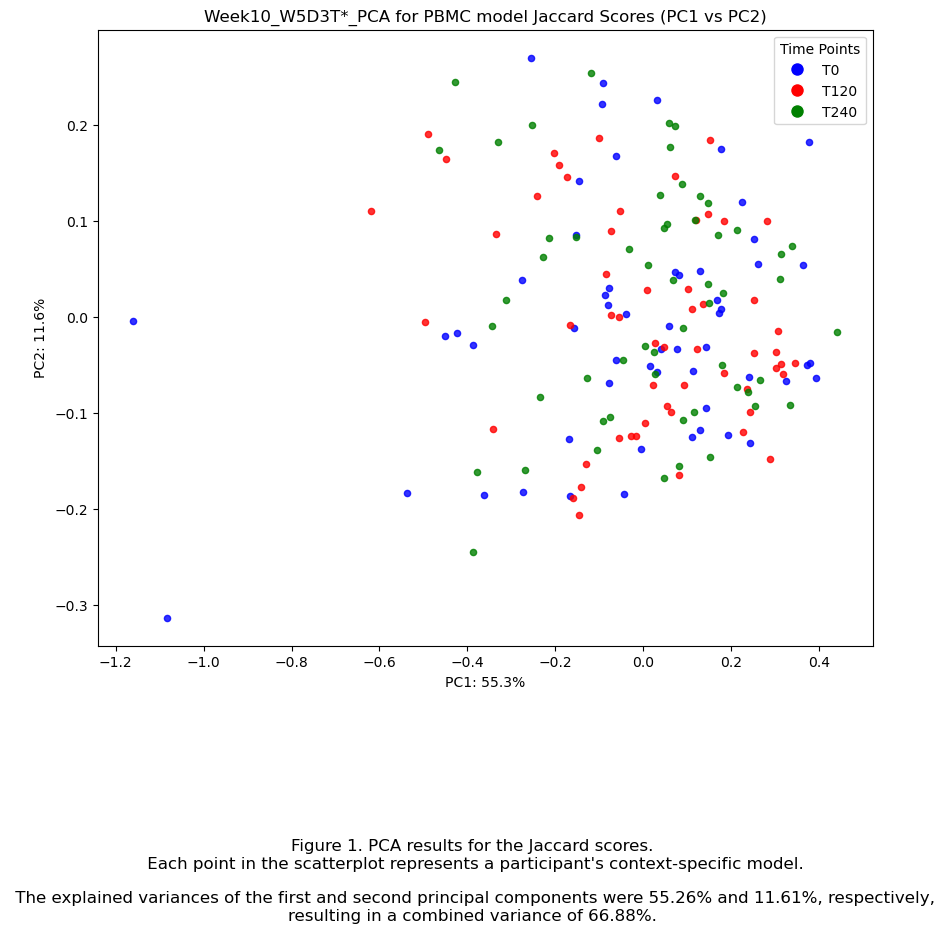

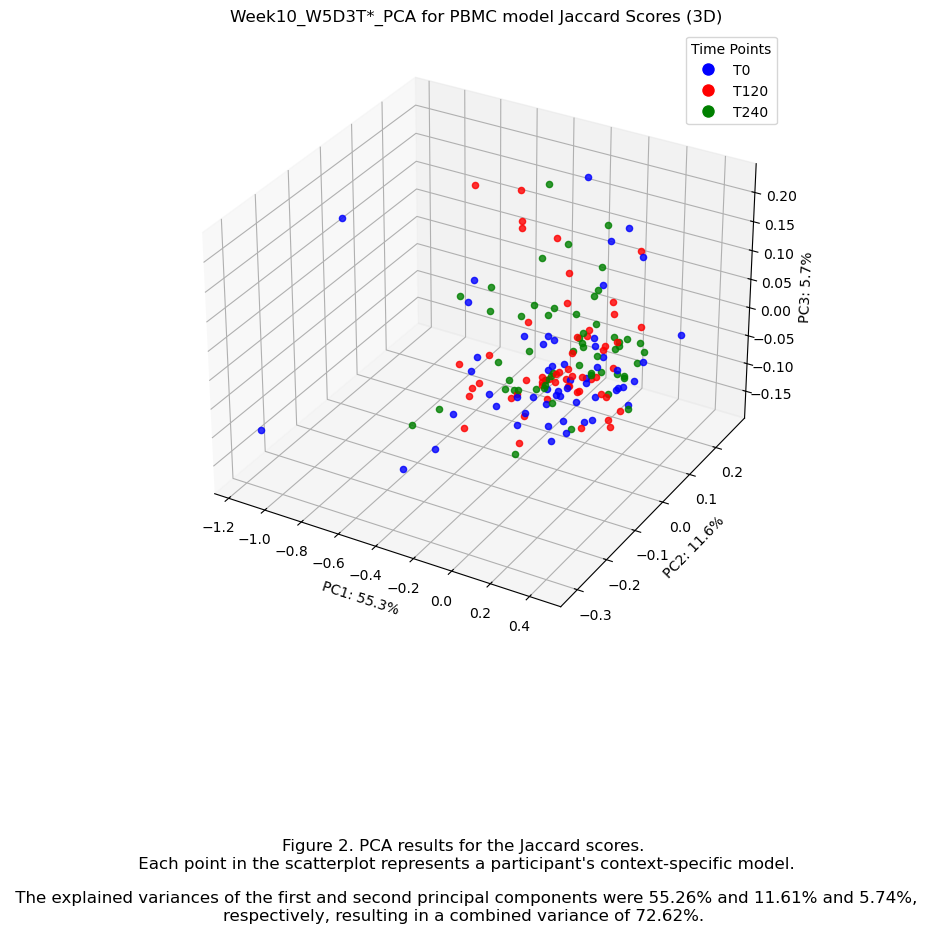

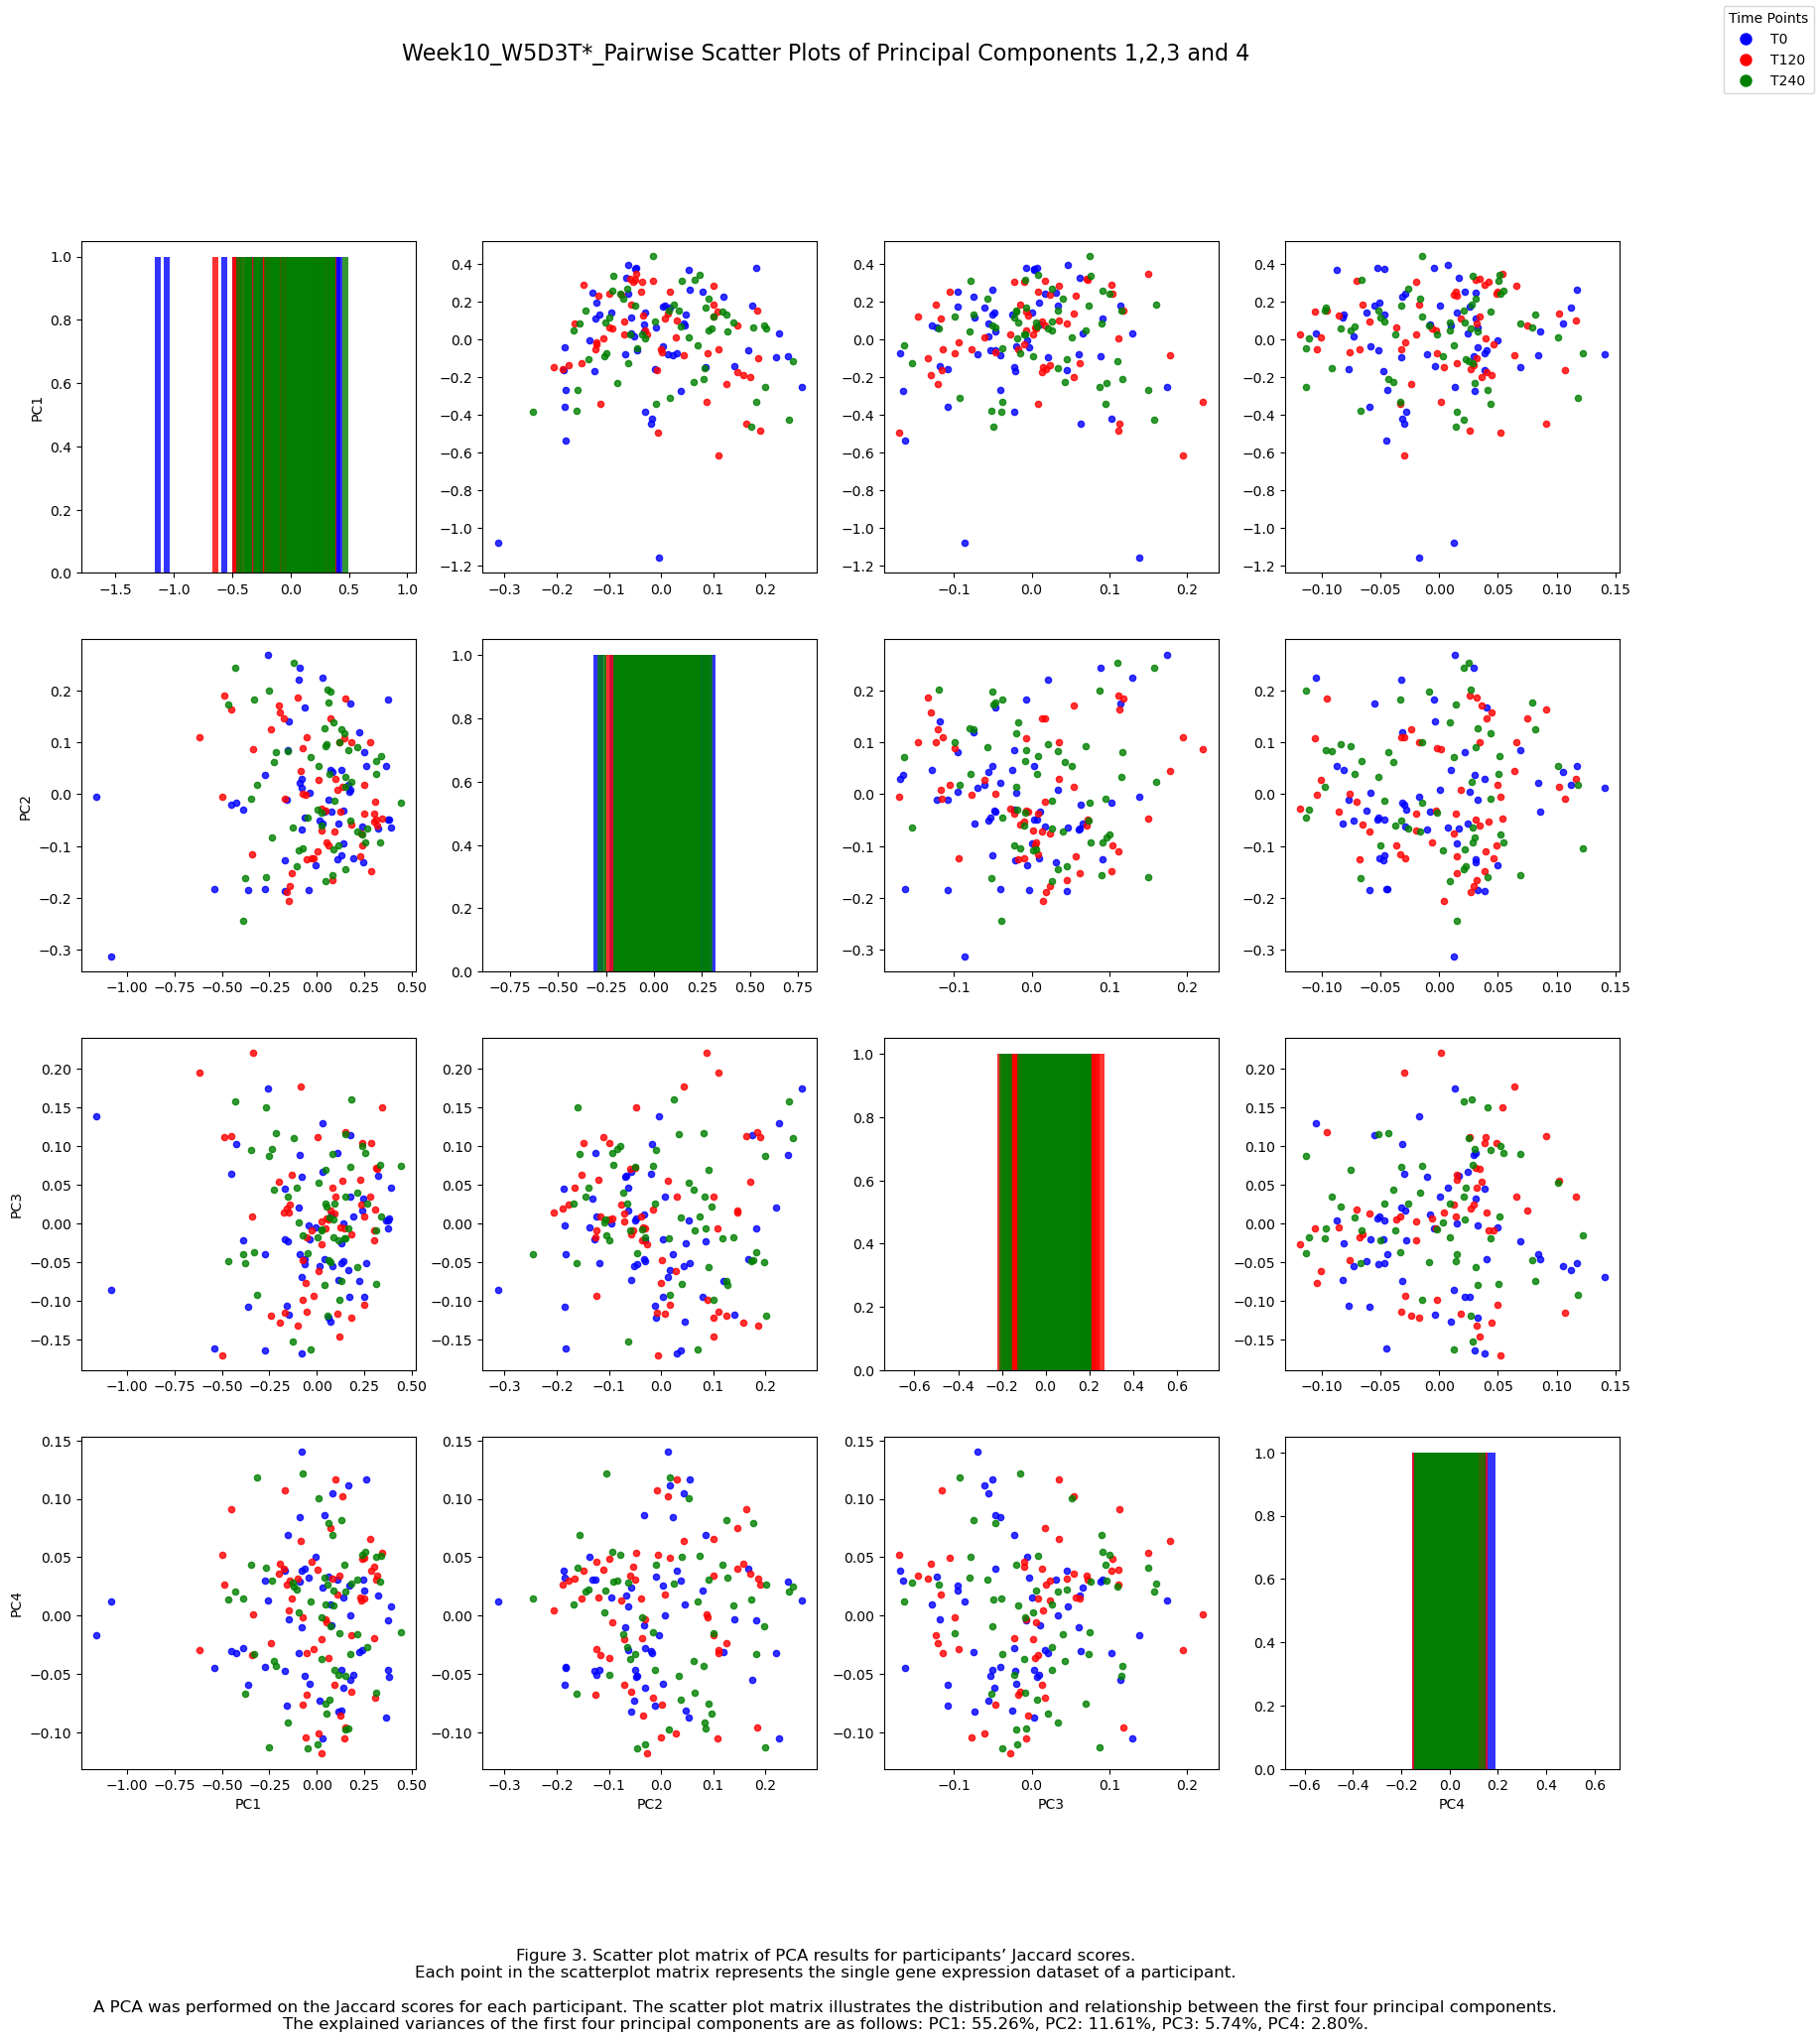

In [3]:
import os
import cobra
from cobra.io import load_matlab_model
import numpy as np
from scipy.io import savemat, loadmat

# Directories containing the .mat files
directory_paths = {
    'T0': '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T0',
    'T120': '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T120',
    'T240': '/Users/douglas/Library/CloudStorage/OneDrive-UniversityCollegeCork/Msc Bioinformatics and Computational Biology/MB6303 Dissertion in Bioinformatics & Computational Biology/Practical Work/python_/week 10 , Run FBA, FVA , sampling ,pca of jaccard scores/W5D3T240'
}

# Load all models from the directories
context_specific_models = []
labels = []
for time_point, directory_path in directory_paths.items():
    for filename in sorted(os.listdir(directory_path)):
        if filename.endswith(".mat"):
            file_path = os.path.join(directory_path, filename)
            model = load_matlab_model(file_path)
            context_specific_models.append(model)
            labels.append(time_point)

print(f"Loaded {len(context_specific_models)} models.")

# Function to calculate Jaccard index
def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

# Calculate Jaccard scores
def calculate_jaccard(models):
    num_models = len(models)
    jaccard_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        reactions_i = set([rxn.id for rxn in models[i].reactions])
        for j in range(i, num_models):
            reactions_j = set([rxn.id for rxn in models[j].reactions])
            jaccard_matrix[i, j] = jaccard_index(reactions_i, reactions_j)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix
    
    return jaccard_matrix

# Calculate Jaccard scores for context-specific models
jaccard_scores = calculate_jaccard(context_specific_models)
print("Jaccard distance matrix calculated.")
print(jaccard_scores)

# Save the Jaccard scores to a .mat file
output_file = 'Week10_W5D3T*_JaccardScore.mat'
savemat(output_file, {'JaccardScore': jaccard_scores})
print(f"Jaccard scores saved to {output_file}.")

# -*- coding: utf-8 -*-
"""
Created on Tue Aug 11 22:44:59 2020

TASK:
This script will plot the Jaccard distance heatmap and PCA plot between pairs of context-specific monocyte models.

INPUT:
    Week10_W5D3T*_JaccardScore.mat --> This is a matrix records Jaccard distance between
     pair of models.

@author: lxs
"""

import numpy as np
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
from adjustText import adjust_text

file_ID = 'Week10_W5D3T*_'
# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T*_JaccardScore.mat')['JaccardScore']

# Define labels
labels_num = [str(i) for i in range(1, len(jaccardScore) + 1)]

# Color coding based on time points
colors = ['blue' if label == 'T0' else 'red' if label == 'T120' else 'green' for label in labels]

################### Plot Jaccard distance heatmap
sns.heatmap(jaccardScore, annot=True, linewidth=1)
simplefilter("ignore", ClusterWarning)

################### Plot cluster map
g = sns.clustermap(jaccardScore, method='average')
g.ax_heatmap.set(yticks=np.arange(1, len(jaccardScore) + 1), xticks=np.arange(1, len(jaccardScore) + 1))
g.ax_heatmap.set_xticklabels(labels_num, fontsize=5, rotation=90)
g.ax_heatmap.set_yticklabels(labels_num, fontsize=5, rotation=0)
g.savefig(f'{file_ID}fig.0_PBMC_JaccardHeatmap.png', dpi=1000)

# Uncomment to suppress dendrograms
# g.ax_heatmap.set_title("Jaccard Scores for Monocyte Models")
# g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

################### PCA plot
# Perform PCA
pca = PCA(n_components=3)
pcaData = pca.fit_transform(jaccardScore)
print(pca.explained_variance_ratio_)

title_font = {
    'weight': 'medium',
    'size': 12,
}

axis_font = {
    'weight': 'normal',
    'size': 10,
}

# Plot PCA scatter plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
annotations = []
for i in range(len(labels_num)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    plt.scatter(xs, ys, s=20, marker='o', color=colors[i], alpha=0.8)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='T0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='T120'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='T240')]
plt.legend(handles=handles, title="Time Points")

plt.title(f'{file_ID}PCA for PBMC model Jaccard Scores (PC1 vs PC2)', title_font)
plt.xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), axis_font)
plt.ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), axis_font)
plt.figtext(0.5, -0.23, (f'Figure 1. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'{file_ID}fig.1_PCA for PBMC model Jaccard Scores (PC1 vs PC2).png', dpi=1000)

####################### Plot 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))  # Adjust the size here
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels_num)):
    xs = pcaData[i, 0]
    ys = pcaData[i, 1]
    zs = pcaData[i, 2]
    ax.scatter(xs, ys, zs, s=20, marker='o', color=colors[i], alpha=0.8)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='T0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='T120'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='T240')]
ax.legend(handles=handles, title="Time Points")

ax.set_title(f'{file_ID}PCA for PBMC model Jaccard Scores (3D)', fontdict=title_font)
ax.set_xlabel('PC1: {:.1%}'.format(pca.explained_variance_ratio_[0]), fontdict=axis_font)
ax.set_ylabel('PC2: {:.1%}'.format(pca.explained_variance_ratio_[1]), fontdict=axis_font)
ax.set_zlabel('PC3: {:.1%}'.format(pca.explained_variance_ratio_[2]), fontdict=axis_font)

plt.savefig(f'{file_ID}fig.2_PCA for PBMC model Jaccard Scores (3D).png', dpi=1000)
plt.figtext(0.5, -0.23, (f'Figure 2. PCA results for the Jaccard scores.\n Each point in the scatterplot represents a participant\'s context-specific model.\n\n The explained variances of the first and second principal components were {pca.explained_variance_ratio_[0]*100:.2f}% and {pca.explained_variance_ratio_[1]*100:.2f}% and {pca.explained_variance_ratio_[2]*100:.2f}%, respectively, resulting in a combined variance of {((pca.explained_variance_ratio_[0]*100)+(pca.explained_variance_ratio_[1]*100)+(pca.explained_variance_ratio_[2]*100)):.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

####################### Create a 4x4 plot matrix of PC1, PC2, PC3, and PC4

# Load Jaccard scores
jaccardScore = loadmat('Week10_W5D3T*_JaccardScore.mat')['JaccardScore']

# Perform PCA
pca = PCA(n_components=4)
pcaData = pca.fit_transform(jaccardScore)
explained_variance = pca.explained_variance_ratio_

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4']
components = [pcaData[:, 0], pcaData[:, 1], pcaData[:, 2], pcaData[:, 3]]

# Color coding based on time points
colors = ['blue' if label == 'T0' else 'red' if label == 'T120' else 'green' for label in labels]

for i in range(4):
    for j in range(4):
        if i == j:
            for k, c in zip(components[i], colors):
                axs[i, j].hist(k, bins=20, color=c, alpha=0.8)
        else:
            for x, y, c in zip(components[j], components[i], colors):
                axs[i, j].scatter(x, y, color=c, s=20, alpha=0.8)
        if i == 3:
            axs[i, j].set_xlabel(pc_labels[j])
        if j == 0:
            axs[i, j].set_ylabel(pc_labels[i])

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='T0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='T120'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='T240')]
fig.legend(handles=handles, title="Time Points", loc='upper right')

plt.suptitle(f'{file_ID}Pairwise Scatter Plots of Principal Components 1,2,3 and 4', fontsize=16, weight='medium')
plt.figtext(0.5, -0.02, (f'Figure 3. Scatter plot matrix of PCA results for participants’ Jaccard scores.\n'
                         f'Each point in the scatterplot matrix represents the single gene expression dataset of a participant.\n\n'
                         f'A PCA was performed on the Jaccard scores for each participant. The scatter plot matrix illustrates the distribution and relationship between the first four principal components.\n'
                         f'The explained variances of the first four principal components are as follows: PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%, PC4: {explained_variance[3]*100:.2f}%.'), wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'{file_ID}fig.3_Pairwise Scatter Plots of Principal Components 1,2,3 and 4.png', dpi=1000)
plt.show()

